# REGRESSION PROJECT


## Store Sales Prediction

## Hypothesis and Research Questions





* Null Hypothesis: Promotions have no significant effect on product sales.
* Alternate Hypothesis:  Promotions positively impact product sales, leading to increased sales during promotional periods.

Research questions: 

1)	What is the effect of seasonal variations (e.g., Monthly, or quarterly patterns) on total sales?
2)	What store is the highest performer in terms of sales?
3)	What are the best-selling products per location?
4)	Does store size affect total sales?
5)	Which days have the most sales?

## Installations and Imports

In [2]:
#%pip install seaborn 
#%pip install scikit-learn
#pip install plotly
#pip install --upgrade nbformat
#pip install missingno
#pip install statsmodels
#%pip install pmdarima


In [177]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pickle
import joblib
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from scipy import stats
from scipy.stats import boxcox
from pmdarima import auto_arima
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.arima.model import ARIMA

## Data Preparation
Before applying machine learning to time series data, it is crucial to preprocess and prepare the data. This may include handling missing values, dealing with outliers, and ensuring that the data is appropriately sampled or resampled if necessary. Time series data often requires specific preprocessing steps like differencing, seasonality removal, or decomposition. 

### Read, Clean, Merge, and Perform Univariate and Bivariate Analysis

In [4]:
# import oil.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype


oil=pd.read_csv('oil.csv', parse_dates=['date'])

oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [5]:
# rename column 'dcoilwtico' to oil_price for easy reference

oil.rename(columns={'dcoilwtico':'oil_prices'}, inplace=True)
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   oil_prices  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [6]:
# import holidays_events.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

holidays_eve=pd.read_csv('holidays_events.csv', parse_dates=['date'])
holidays_eve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


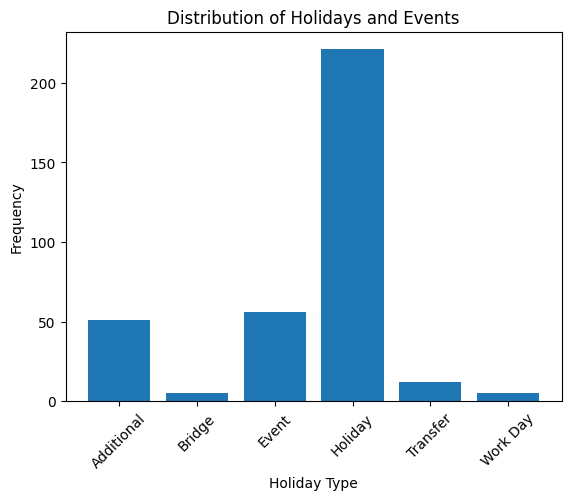

In [7]:
# create a bar plot visualization of the holidays event dataset

# Grouping by 'type' and counting occurrences of each 'locale'
locale_counts = holidays_eve.groupby('type')['locale'].count()

plt.bar(locale_counts.index, locale_counts.values)
plt.xlabel('Holiday Type')
plt.ylabel('Frequency')
plt.title('Distribution of Holidays and Events')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [8]:
holidays_eve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [9]:
# import stores.csv with a pd.read_csv
# and display columns, Non-Null, and datatype with .info()


stores=pd.read_csv('stores.csv')
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


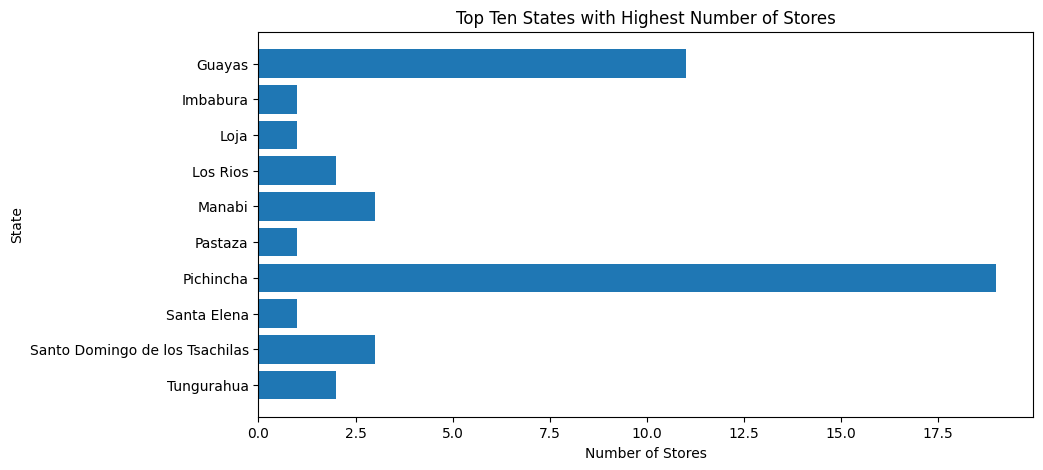

In [10]:
# Visualize the Top ten states with highest number of stores
# Grouping by state and counting the number of stores
state_counts = stores.groupby('state')['store_nbr'].count()

grouped_state_counts = state_counts.sort_index(ascending=False)

# Selecting the top ten states
top_ten_states = grouped_state_counts.head(10)

# Creating a horizontal bar plot for top ten states
plt.figure(figsize=(10, 5))
plt.barh(top_ten_states.index, top_ten_states.values)
plt.ylabel('State')
plt.xlabel('Number of Stores')
plt.title('Top Ten States with Highest Number of Stores')
plt.show()

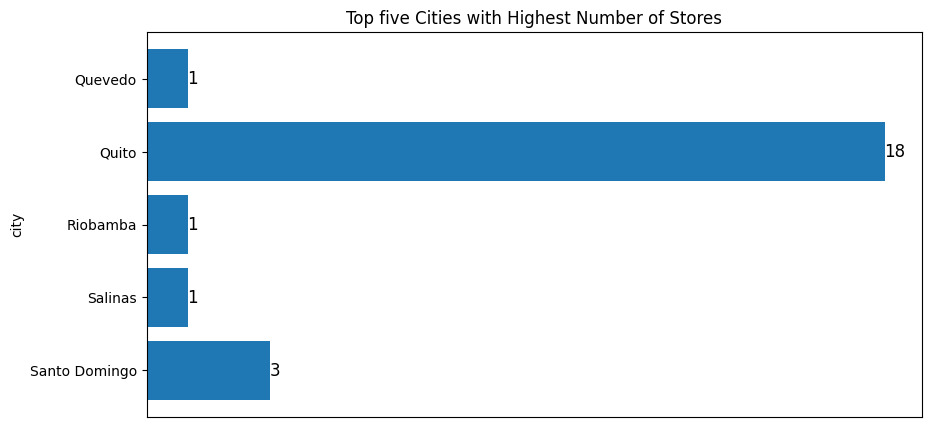

In [11]:
# Visualize the tope five cities with highest number of stores
# Grouping by state and counting the number of stores

city_counts = stores.groupby('city')['store_nbr'].count()

grouped_city_counts = city_counts.sort_index(ascending=False)

# Selecting the top ten states
top_five_city = grouped_city_counts.head()

# Creating a horizontal bar plot for top ten states
plt.figure(figsize=(10, 5))
plt.barh(top_five_city.index, top_five_city.values)
plt.ylabel('city')
plt.xlabel('Number of Stores')
plt.title('Top five Cities with Highest Number of Stores')

# Adding data values on each bar
for index, value in enumerate(top_five_city.values):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black')

# Remove the x-axis
plt.gca().axes.get_xaxis().set_visible(False)

plt.show()


In [12]:
# import transactions.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

transactions=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\Regression_Project\Datasets\transactions.csv', parse_dates=['date'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [13]:
# Visualize distribution of transactions per store

# Grouping by store_nbr and summing the transactions
transactions_grouped = transactions.groupby('store_nbr')['transactions'].sum()
# Series contains the sum of transactions for each store number. 
# Sorting the results in descending order based on the sum of transactions
transactions_sorted = transactions_grouped.sort_values(ascending=False)
#Top five stores with highest transactions
top_five_stores = transactions_sorted.head(5)

top_five_stores

store_nbr
44    7273093
47    6535810
45    6201115
46    5990113
3     5366350
Name: transactions, dtype: int64

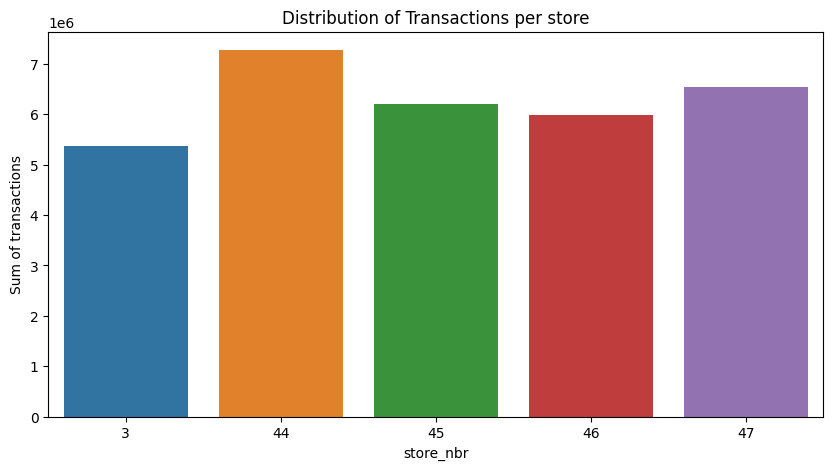

In [14]:
plt.figure(figsize=(10,5))
plt.xlabel('store number')
plt.ylabel('Sum of transactions')
plt.title('Distribution of Transactions per store')
sns.barplot(x=top_five_stores.index, y=top_five_stores.values)
plt.show()

In [15]:
# import test.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

test=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\Regression_Project\Datasets\test.csv', parse_dates=['date'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [16]:
# import train.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

train=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\train.csv', parse_dates=['date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB



Check date ranges of imported datasets

In [17]:
# check range of dates for oil.csv

oil['date'].min(), oil['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

<Axes: >

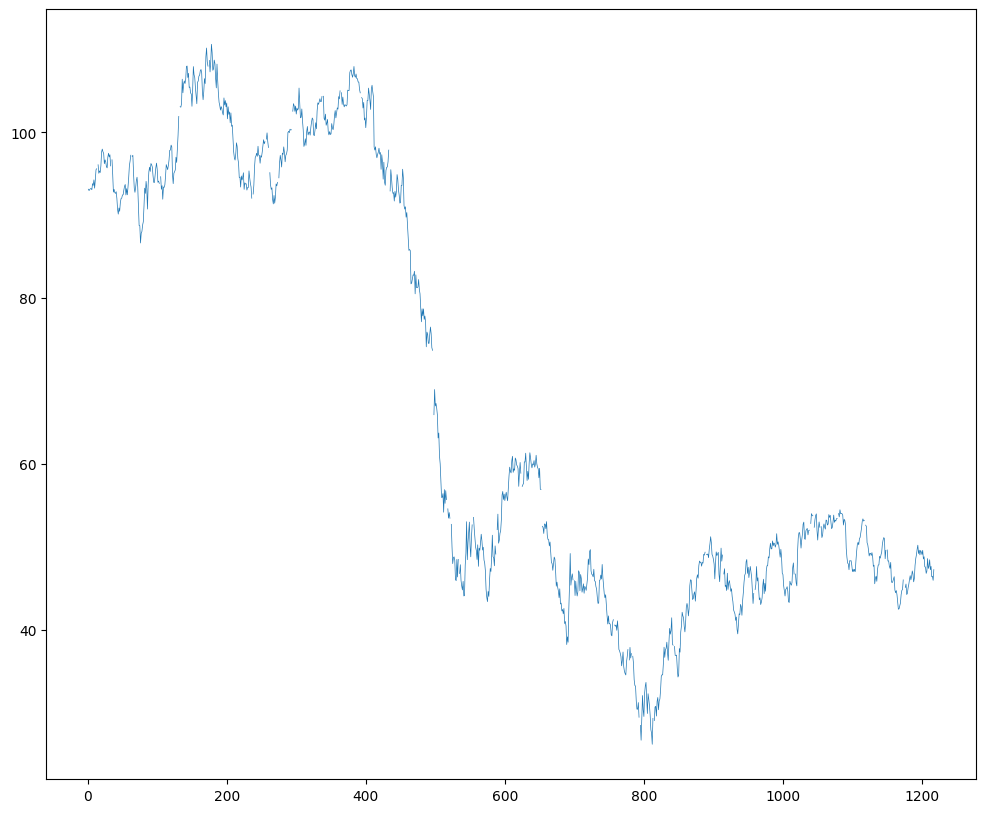

In [18]:
# visualize oil data

plt.figure(figsize=(12,10))
oil['oil_prices'].plot(linewidth=0.5)

In [19]:
#visualize oil prices with a date slider for close observation

fig = px.line(oil,x='date', y='oil_prices', title='Daily Crude Oil Prices from 2013 to 2017')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [21]:
# check range of dates for test.csv

test['date'].min(), test['date'].max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [22]:
# check range of dates for train.csv

train['date'].min(), train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [24]:
# split oil.csv on the dates that reflects the split for the test and train
#define the start and end dates for the oil.csv that will be joined to the test

oil_test_start_date= '2017-08-16'
oil_test_end_date= '2017-08-31'

oil_train = oil[oil['date'] < oil_test_start_date]
oil_test = oil[oil['date'].between (oil_test_start_date, oil_test_end_date)]

# Verify the split
range_oil_test = oil_test['date'].min(), oil_test['date'].max()
range_oil_train = oil_train['date'].min(), oil_train['date'].max()

print(range_oil_test)
print(range_oil_train)


(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))
(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


In [25]:
# merge test and oil_test on 'date'

merged_test = pd.merge(test, oil_test, on='date', how='left')
print(merged_test.head())

        id       date  store_nbr      family  onpromotion  oil_prices
0  3000888 2017-08-16          1  AUTOMOTIVE            0   46.799999
1  3000889 2017-08-16          1   BABY CARE            0   46.799999
2  3000890 2017-08-16          1      BEAUTY            2   46.799999
3  3000891 2017-08-16          1   BEVERAGES           20   46.799999
4  3000892 2017-08-16          1       BOOKS            0   46.799999


In [26]:
#check for null or missing values

merged_test.isnull().sum()

id                0
date              0
store_nbr         0
family            0
onpromotion       0
oil_prices     7128
dtype: int64

In [27]:
# calculate the percentage of missing data against the total values

mis_test_value_percent = 100*merged_test.isnull().sum()/len(merged_test)
print(mis_test_value_percent)

id              0.0
date            0.0
store_nbr       0.0
family          0.0
onpromotion     0.0
oil_prices     25.0
dtype: float64


We have a 25 percent missing values in oil_prices due to the merging. Though the initial oil_test had no missing values. This can be solved with forward filling missing values

In [28]:
# forward fill missing 'oil_prices' 

forward_filled_merge_test = merged_test['oil_prices'].fillna(method='ffill', inplace=True)
print(forward_filled_merge_test)

None


In [29]:
merged_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
oil_prices     0
dtype: int64

In [30]:
#display random sample of 10 rows

merged_test.sample(10, random_state = 0)

,id,date,store_nbr,family,onpromotion,oil_prices
12290,3013178,2017-08-22,53,HARDWARE,0,47.650002
4348,3005236,2017-08-18,30,PERSONAL CARE,7,48.590000
6617,3007505,2017-08-19,44,HOME APPLIANCES,0,48.590000
13693,3014581,2017-08-23,42,SCHOOL AND OFFICE SUPPLIES,0,48.450001
3008,3003896,2017-08-17,43,BREAD/BAKERY,8,47.070000
12793,3013681,2017-08-23,18,"LIQUOR,WINE,BEER",3,48.450001
5078,3005966,2017-08-18,50,PREPARED FOODS,0,48.590000
8487,3009375,2017-08-20,47,CELEBRATION,0,48.590000
24504,3025392,2017-08-29,46,HOME CARE,5,46.459999
8184,3009072,2017-08-20,39,AUTOMOTIVE,0,48.590000


<Axes: >

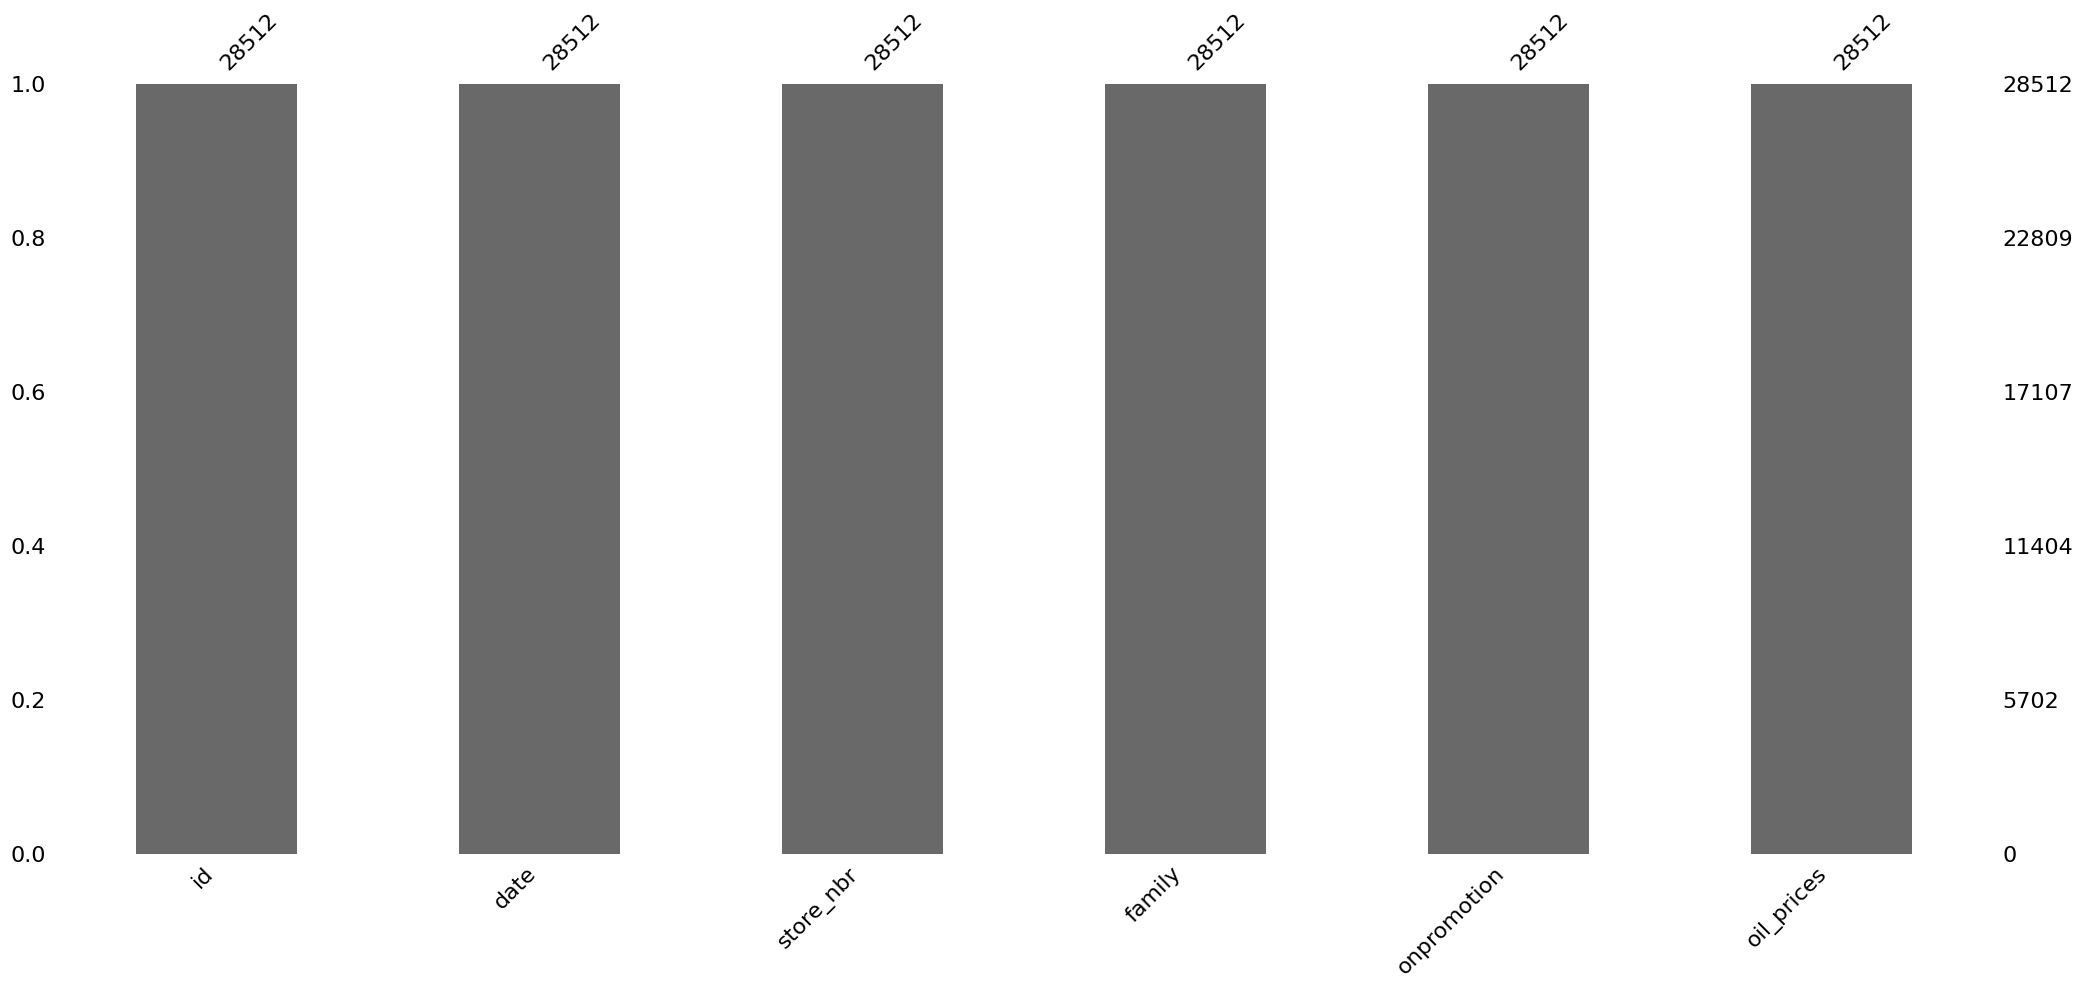

In [31]:
msno.bar(merged_test)

In [32]:
# check for null values of the oil_train dataset

oil_train.isnull().sum()

date           0
oil_prices    43
dtype: int64

In [33]:
# Interpolate missing values using linear interpolation
# interpolation method used to capture local trends because there were few missing values within a relatively stable trend

oil_train_interpolated = oil_train.interpolate(method='linear')

In [34]:
# check missing values

oil_train_interpolated.isnull().sum()

date          0
oil_prices    1
dtype: int64

In [35]:
# back fill missing data at the beginning of dataset 
# check if missing data is filled

oil_train_interpolated['oil_prices'].fillna(method='bfill', inplace=True)
oil_train_interpolated.isnull().sum()

date          0
oil_prices    0
dtype: int64

In [36]:
# merge train and oil_train_interpolated datasets
# print merged dataset to see if successfull

merged_train = pd.merge(oil_train_interpolated, train, on='date', how='right')
print(merged_train.head())

        date  oil_prices  id  store_nbr      family  sales  onpromotion
0 2013-01-01   93.139999   0          1  AUTOMOTIVE    0.0            0
1 2013-01-01   93.139999   1          1   BABY CARE    0.0            0
2 2013-01-01   93.139999   2          1      BEAUTY    0.0            0
3 2013-01-01   93.139999   3          1   BEVERAGES    0.0            0
4 2013-01-01   93.139999   4          1       BOOKS    0.0            0


In [37]:
merged_train.shape

(3000888, 7)

In [38]:
# check for missing values in merged dataset

merged_train.isnull().sum()

date                0
oil_prices     857142
id                  0
store_nbr           0
family              0
sales               0
onpromotion         0
dtype: int64

<Axes: >

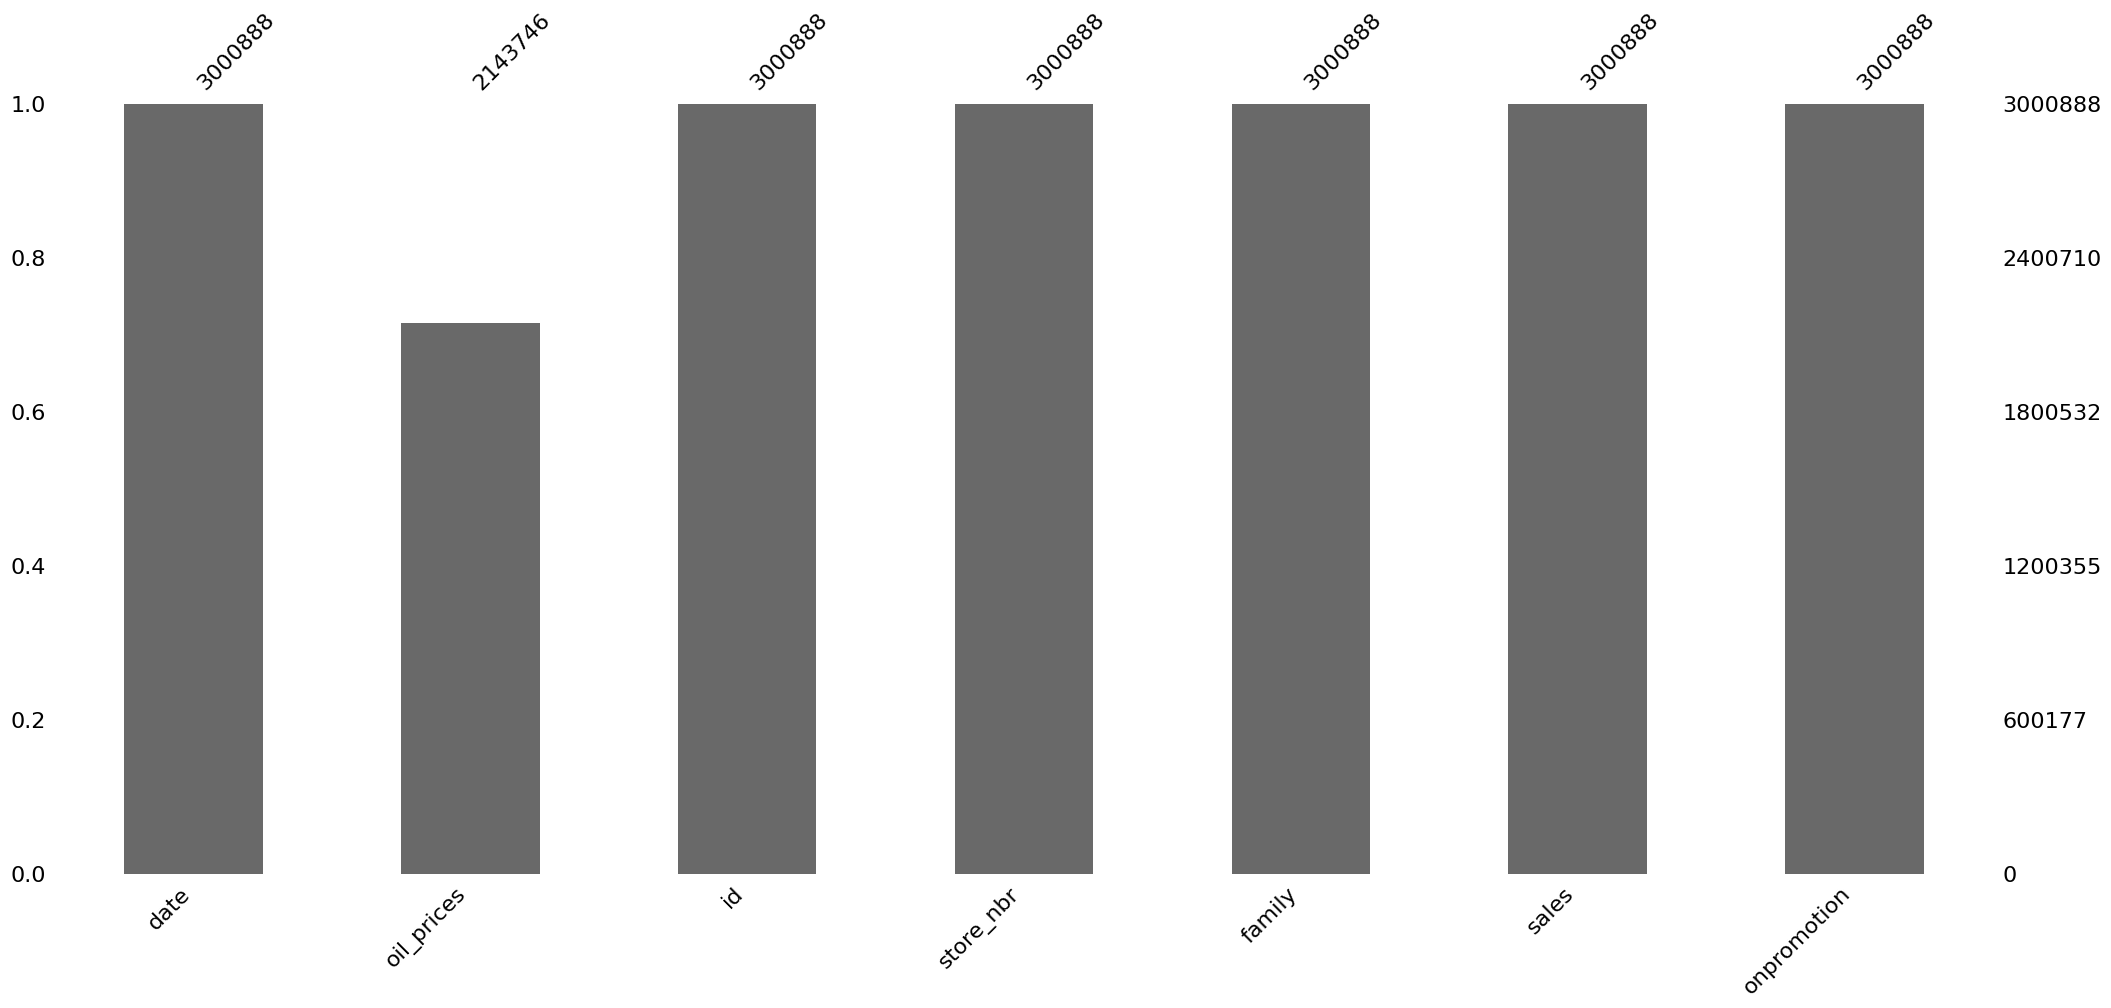

In [39]:
msno.bar(merged_train)

In [40]:
# calculate the percentage of missing data against the total values
# we observe a 28.5% missing data in oil_prices column

mis_train_value_percent = 100*merged_train.isnull().sum()/len(merged_train)
print(mis_train_value_percent)

date            0.000000
oil_prices     28.562945
id              0.000000
store_nbr       0.000000
family          0.000000
sales           0.000000
onpromotion     0.000000
dtype: float64


<Axes: >

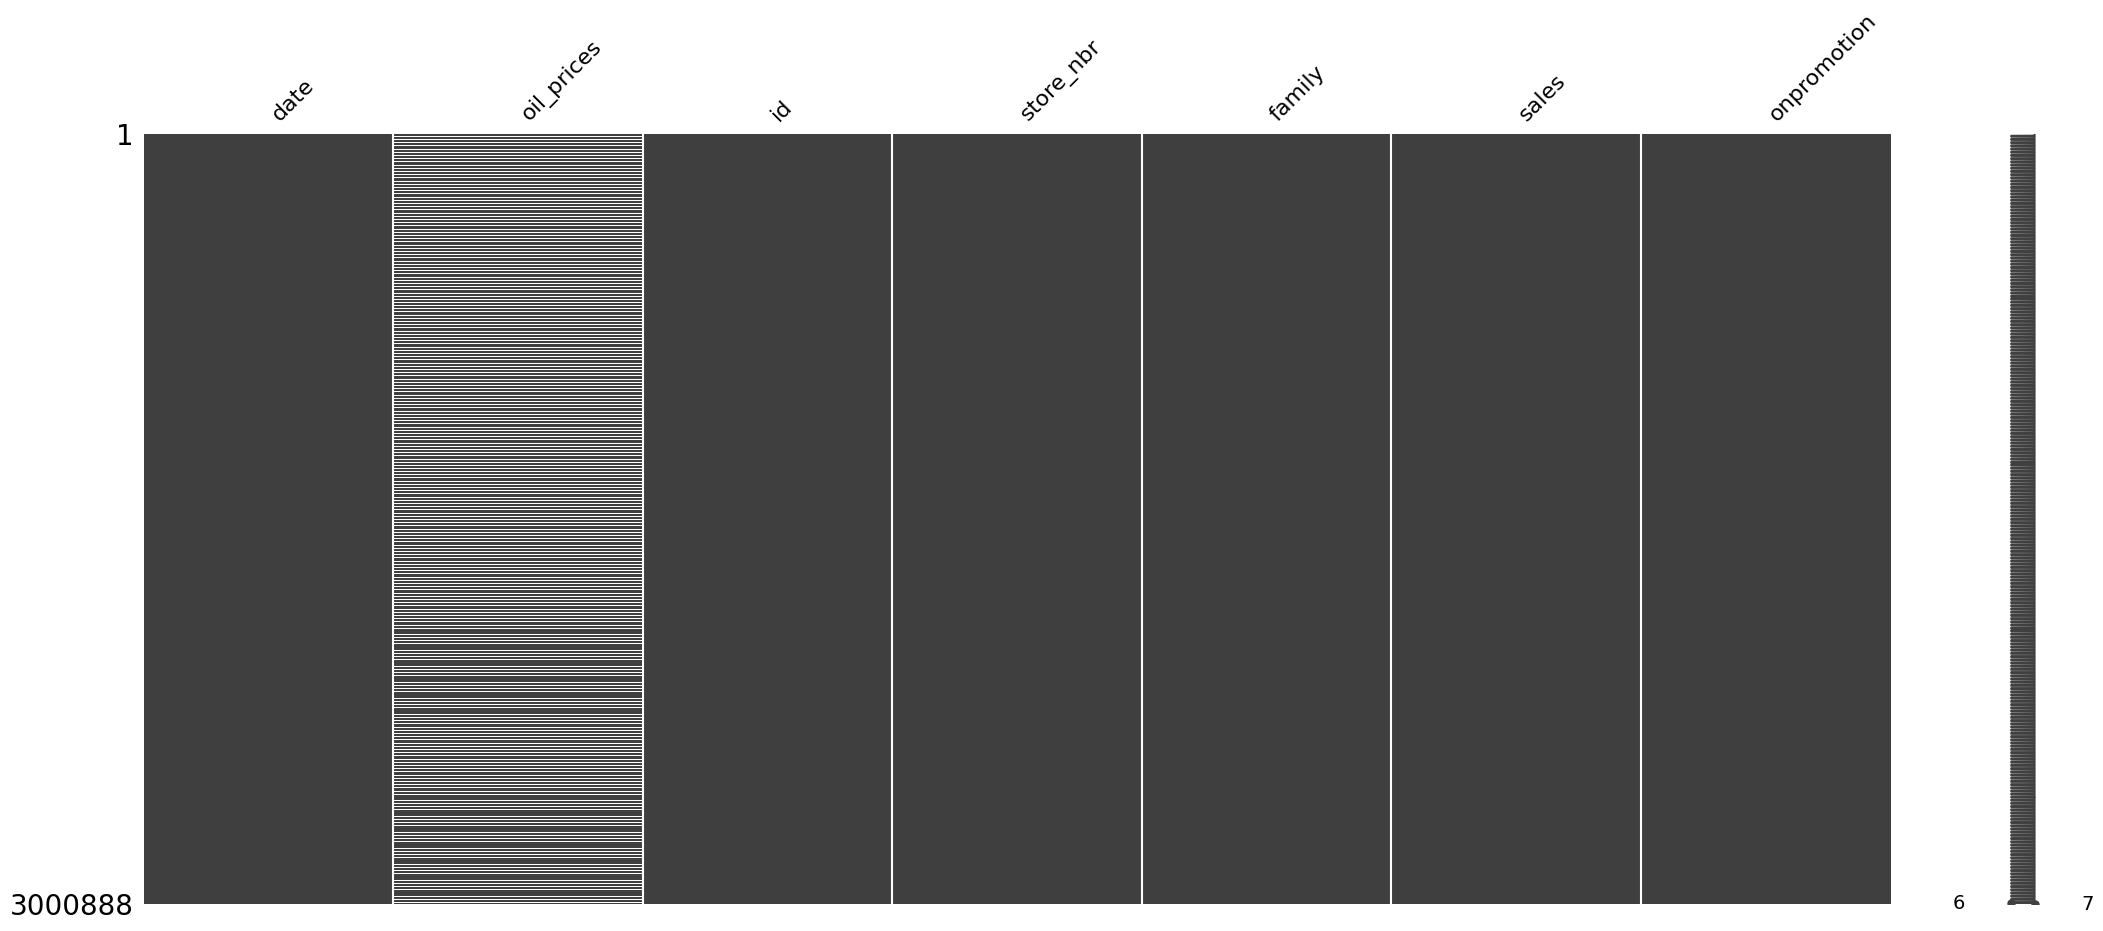

In [41]:
# plot a matrix visualization of missing values in merged train
# check how the missing date is distributed through our merged data
# missing data in the oil_prices columns shows a missing at random

msno.matrix(merged_train)

In [42]:
merged_train.shape

(3000888, 7)

In [43]:
#look at missing rows in merged_train

merged_train.query('oil_prices != oil_prices')

,date,oil_prices,id,store_nbr,family,sales,onpromotion
7128,2013-01-05,NaN,7128,1,AUTOMOTIVE,5.000,0
7129,2013-01-05,NaN,7129,1,BABY CARE,0.000,0
7130,2013-01-05,NaN,7130,1,BEAUTY,3.000,0
7131,2013-01-05,NaN,7131,1,BEVERAGES,1160.000,0
7132,2013-01-05,NaN,7132,1,BOOKS,0.000,0
...,...,...,...,...,...,...,...
2997319,2017-08-13,NaN,2997319,9,POULTRY,412.458,0
2997320,2017-08-13,NaN,2997320,9,PREPARED FOODS,105.169,1
2997321,2017-08-13,NaN,2997321,9,PRODUCE,1693.607,7
2997322,2017-08-13,NaN,2997322,9,SCHOOL AND OFFICE SUPPLIES,200.000,8


In [44]:
# check the shape of merged_train

merged_train.shape

(3000888, 7)

In [45]:
# forward fill missing 'oil_prices' 

forward_filled_merge_train = merged_train['oil_prices'].fillna(method='ffill', inplace=True)
print(forward_filled_merge_train)

None


In [46]:
merged_train.isnull().sum()

date           0
oil_prices     0
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [47]:
merged_train.head()

,date,oil_prices,id,store_nbr,family,sales,onpromotion
0,2013-01-01,93.139999,0,1,AUTOMOTIVE,0.0,0
1,2013-01-01,93.139999,1,1,BABY CARE,0.0,0
2,2013-01-01,93.139999,2,1,BEAUTY,0.0,0
3,2013-01-01,93.139999,3,1,BEVERAGES,0.0,0
4,2013-01-01,93.139999,4,1,BOOKS,0.0,0


In [48]:
merged_test['store_nbr'].nunique()

54

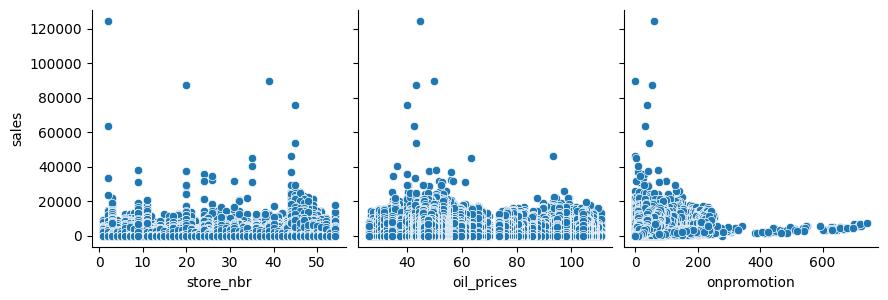

In [49]:
# Pair plot between store_nbr, oil prices, and onpromotion

sns.pairplot(merged_train,x_vars=['store_nbr','oil_prices','onpromotion'],y_vars=['sales'],height=3,aspect=1)
plt.show()

In [50]:
merged_train['family'].nunique()

33

<Axes: xlabel='date', ylabel='sales'>

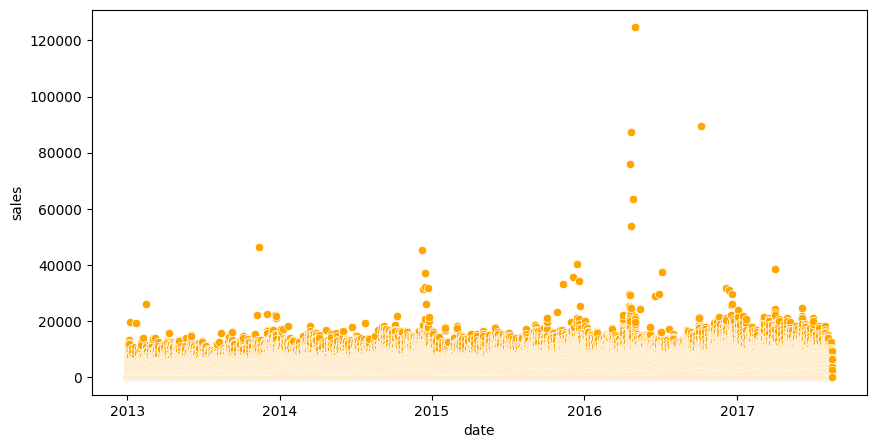

In [51]:
a=merged_train['date']
b=merged_train['sales']
plt.figure(figsize=(10,5))
sns.scatterplot(x=a,y=b,color='orange')

<Axes: xlabel='oil_prices', ylabel='sales'>

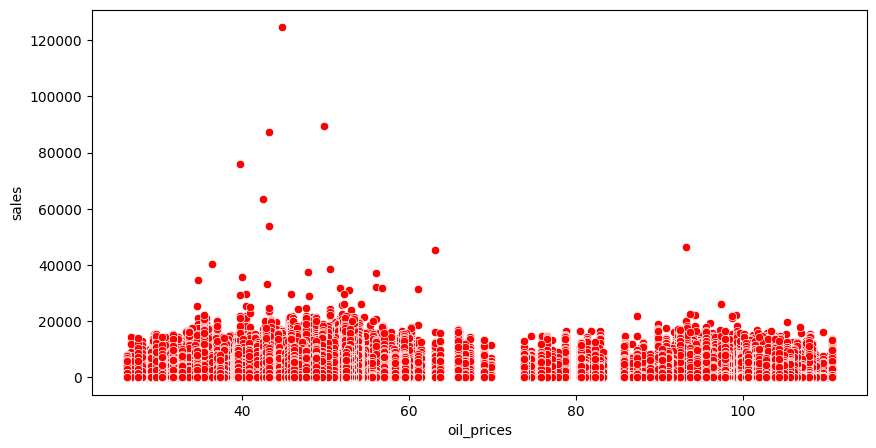

In [52]:
a=merged_train['oil_prices']
b=merged_train['sales']
plt.figure(figsize=(10,5))
sns.scatterplot(x=a,y=b,color='red')

In [53]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   oil_prices   float64       
 2   id           int64         
 3   store_nbr    int64         
 4   family       object        
 5   sales        float64       
 6   onpromotion  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 160.3+ MB


In [54]:
# join merge_train and holidays on 'date'

merged_train_holidays = pd.merge(merged_train, holidays_eve, on='date', how='left')
merged_train_holidays.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   oil_prices   float64       
 2   id           int64         
 3   store_nbr    int64         
 4   family       object        
 5   sales        float64       
 6   onpromotion  int64         
 7   type         object        
 8   locale       object        
 9   locale_name  object        
 10  description  object        
 11  transferred  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 279.6+ MB


In [55]:
merged_train_holidays.isnull().sum()

date                 0
oil_prices           0
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
type           2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64

<Axes: >

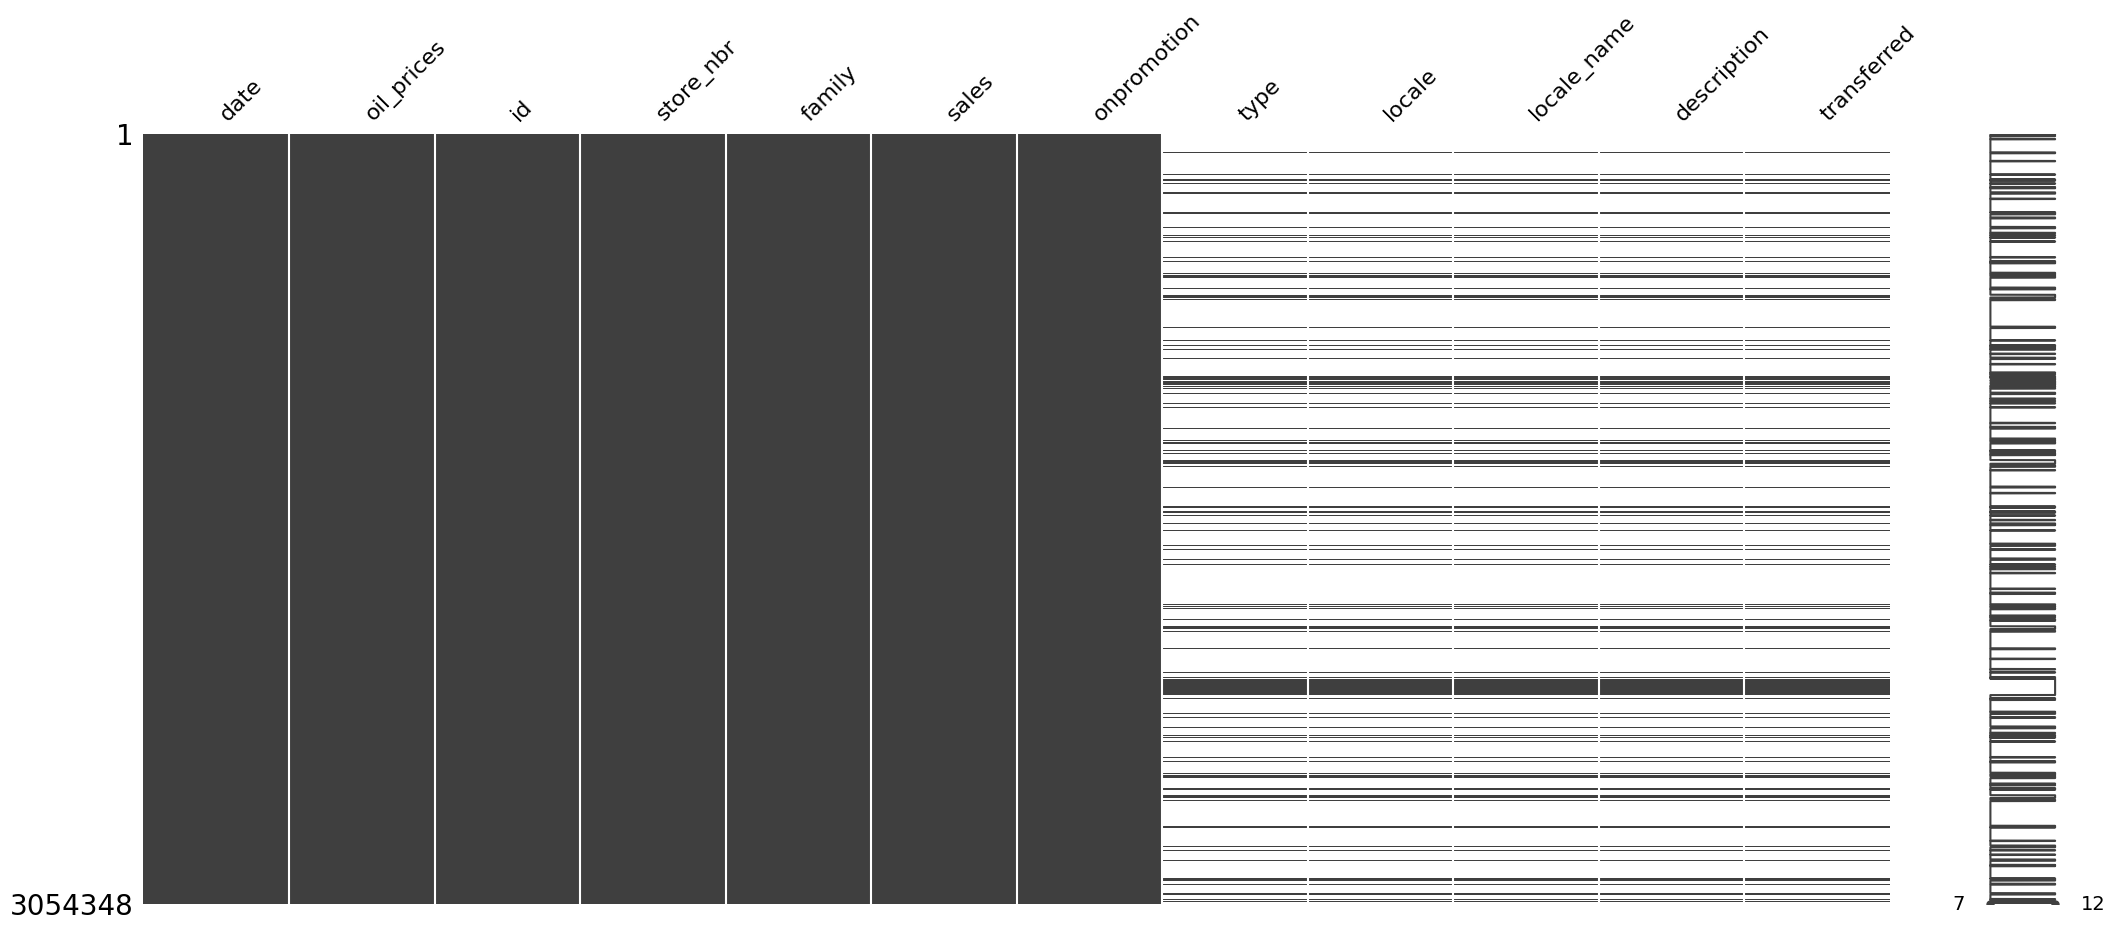

In [56]:
# plot a matrix visualization of missing values in merged_train_holidays
# check how the missing date is distributed through our merged data

msno.matrix(merged_train_holidays)

In [57]:
columns_to_drop = ['locale', 'locale_name', 'description']
merged_train_holidays = merged_train_holidays.drop(columns=columns_to_drop)
merged_train_holidays.isnull().sum()

date                 0
oil_prices           0
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
type           2551824
transferred    2551824
dtype: int64

In [58]:
# Define the unique values to be renamed to 'not holiday'
values_to_rename = ['Transfer', 'Additional', 'Bridge', 'Work Day','Event']

# Rename the specified unique values to 'not holiday'
#merged_train_holidays['Holiday'].replace(values_to_rename, 'not holiday', inplace=True)
merged_train_holidays['type'].replace(values_to_rename, 'not holiday', inplace=True)

# Fill missing values with 'not holiday'
merged_train_holidays['type'].fillna('not holiday', inplace=True)

merged_train_holidays.isnull().sum()

date                 0
oil_prices           0
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
type                 0
transferred    2551824
dtype: int64

In [59]:
# fill missing values in 'transferred' with False
# Fill missing values with False

merged_train_holidays = merged_train_holidays.fillna(False)
merged_train_holidays.isnull().sum()

date           0
oil_prices     0
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
type           0
transferred    0
dtype: int64

In [60]:
merged_train_holidays.shape

(3054348, 9)

In [61]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [62]:
# join merge_train_holidays and stores on 'store_nbr'

merged_train_holidays_stores = pd.merge(merged_train_holidays, stores, on='store_nbr', how='left')
merged_train_holidays_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   oil_prices   float64       
 2   id           int64         
 3   store_nbr    int64         
 4   family       object        
 5   sales        float64       
 6   onpromotion  int64         
 7   type_x       object        
 8   transferred  bool          
 9   city         object        
 10  state        object        
 11  type_y       object        
 12  cluster      int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 282.5+ MB


In [63]:
merged_train_holidays_stores.isnull().sum()

date           0
oil_prices     0
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
type_x         0
transferred    0
city           0
state          0
type_y         0
cluster        0
dtype: int64

In [64]:
merged_test.shape

(28512, 6)

In [65]:
# join merge_test and holidays on 'date'

merged_test_holidays = pd.merge(merged_test, holidays_eve, on='date', how='left')
merged_test_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   oil_prices   28512 non-null  float64       
 6   type         1782 non-null   object        
 7   locale       1782 non-null   object        
 8   locale_name  1782 non-null   object        
 9   description  1782 non-null   object        
 10  transferred  1782 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 2.4+ MB


In [66]:
merged_test_holidays.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
oil_prices         0
type           26730
locale         26730
locale_name    26730
description    26730
transferred    26730
dtype: int64

<Axes: >

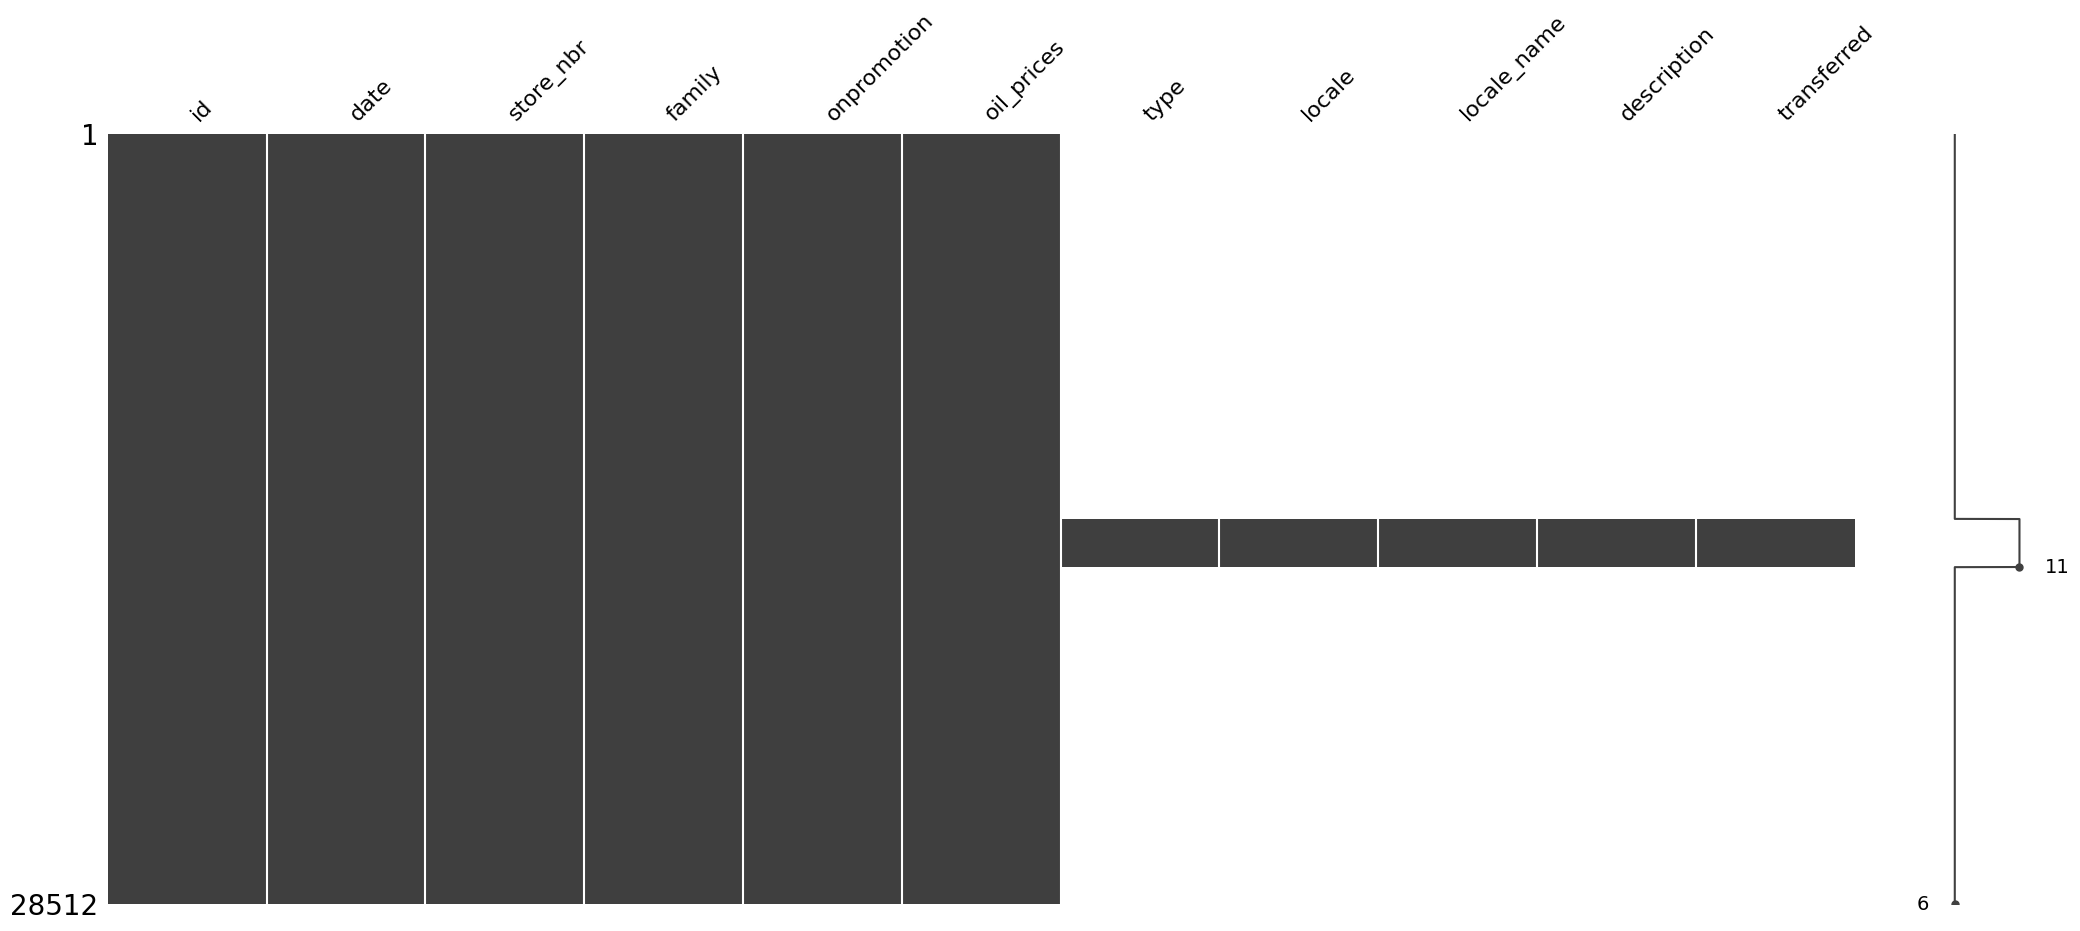

In [67]:
# plot a matrix visualization of missing values in merged_test_holidays
# check how the missing date is distributed through our merged data

msno.matrix(merged_test_holidays)

In [68]:
test_columns_to_drop = ['locale', 'locale_name', 'description']
merged_test_holidays = merged_test_holidays.drop(columns=test_columns_to_drop)
merged_test_holidays.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
oil_prices         0
type           26730
transferred    26730
dtype: int64

In [69]:
# Define the unique values to be renamed to 'not holiday'
values_to_rename = ['Transfer', 'Additional', 'Bridge', 'Work Day','Event']

# Rename the specified unique values to 'not holiday'
#merged_test_holidays['Holiday'].replace(values_to_rename, 'not holiday', inplace=True)
merged_test_holidays['type'].replace(values_to_rename, 'not holiday', inplace=True)

# Fill missing values with 'not holiday'
merged_test_holidays['type'].fillna('not holiday', inplace=True)

merged_test_holidays.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
oil_prices         0
type               0
transferred    26730
dtype: int64

In [70]:
# fill missing values in 'transferred' with False
# Fill missing values with False

merged_test_holidays = merged_test_holidays.fillna(False)
merged_test_holidays.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
oil_prices     0
type           0
transferred    0
dtype: int64

In [71]:
merged_test_holidays.shape

(28512, 8)

In [72]:
# join merge_test_holidays and stores on 'store_nbr'

merged_test_holidays_stores = pd.merge(merged_test_holidays, stores, on='store_nbr', how='left')
merged_test_holidays_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   oil_prices   28512 non-null  float64       
 6   type_x       28512 non-null  object        
 7   transferred  28512 non-null  bool          
 8   city         28512 non-null  object        
 9   state        28512 non-null  object        
 10  type_y       28512 non-null  object        
 11  cluster      28512 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 2.4+ MB


In [73]:
merged_test_holidays_stores.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
oil_prices     0
type_x         0
transferred    0
city           0
state          0
type_y         0
cluster        0
dtype: int64

In [74]:
# check for duplicates in merged_train_holidays_stores and merged_test_holidays_stores

# Check for duplicates in all columns
train_duplicates = merged_train_holidays_stores[merged_train_holidays_stores.duplicated(keep=False)]

if train_duplicates.empty:
    print("No duplicates found in any column.")
else:
    print("Duplicates found in the following rows:")
    print(train_duplicates)

Duplicates found in the following rows:
              date  oil_prices       id  store_nbr  \
313632  2013-06-25   95.250000   311850          1   
313633  2013-06-25   95.250000   311850          1   
313634  2013-06-25   95.250000   311850          1   
313635  2013-06-25   95.250000   311851          1   
313636  2013-06-25   95.250000   311851          1   
...            ...         ...      ...        ...   
2977717 2017-07-03   45.716667  2924259          9   
2977718 2017-07-03   45.716667  2924260          9   
2977719 2017-07-03   45.716667  2924260          9   
2977720 2017-07-03   45.716667  2924261          9   
2977721 2017-07-03   45.716667  2924261          9   

                             family     sales  onpromotion   type_x  \
313632                   AUTOMOTIVE     2.000            0  Holiday   
313633                   AUTOMOTIVE     2.000            0  Holiday   
313634                   AUTOMOTIVE     2.000            0  Holiday   
313635                    B

In [75]:
print(train_duplicates.shape)
print(merged_train_holidays_stores.shape)

(62370, 13)
(3054348, 13)


In [76]:
# Remove rows with all duplicates
clean_train = merged_train_holidays_stores[~merged_train_holidays_stores.duplicated(keep=False)]
clean_train.shape

(2991978, 13)

In [77]:
# Check for duplicates in all columns
test_duplicates = merged_test_holidays_stores[merged_test_holidays_stores.duplicated(keep=False)]

if test_duplicates.empty:
    print("No duplicates found in any column.")
else:
    print("Duplicates found in the following rows:")
    print(test_duplicates)

No duplicates found in any column.


In [78]:
#display random sample of 10 rows

clean_train.sample(10, random_state = 0)

,date,oil_prices,id,store_nbr,family,sales,onpromotion,type_x,transferred,city,state,type_y,cluster
378701,2013-07-28,104.760002,371573,34,PET SUPPLIES,0.000,0,not holiday,False,Guayaquil,Guayas,B,6
2238327,2016-05-24,48.040001,2202687,13,BEVERAGES,1266.000,14,Holiday,True,Latacunga,Cotopaxi,C,15
336858,2013-07-05,103.089996,329730,10,PLAYERS AND ELECTRONICS,0.000,0,not holiday,False,Quito,Pichincha,C,15
2092286,2016-03-08,36.669998,2065556,15,LAWN AND GARDEN,0.000,0,not holiday,False,Ibarra,Imbabura,C,15
1731612,2015-08-18,42.580002,1706664,45,BEVERAGES,6073.000,7,not holiday,False,Quito,Pichincha,A,11
2023277,2016-01-29,33.660000,1996547,29,HARDWARE,1.000,0,not holiday,False,Guayaquil,Guayas,E,10
46981,2013-01-27,95.150002,46981,27,"LIQUOR,WINE,BEER",0.000,0,not holiday,False,Daule,Guayas,D,1
1685366,2015-07-23,48.110001,1660418,47,MAGAZINES,0.000,0,Holiday,False,Quito,Pichincha,A,14
1486204,2015-04-06,52.080002,1466602,1,HOME AND KITCHEN II,3.000,0,not holiday,False,Quito,Pichincha,D,13
1050269,2014-08-05,97.339996,1034231,28,FROZEN FOODS,47.202,0,Holiday,False,Guayaquil,Guayas,E,10


In [79]:
#display random sample of 10 rows

merged_test_holidays_stores.sample(10, random_state = 0)

,id,date,store_nbr,family,onpromotion,oil_prices,type_x,transferred,city,state,type_y,cluster
12290,3013178,2017-08-22,53,HARDWARE,0,47.650002,not holiday,False,Manta,Manabi,D,13
4348,3005236,2017-08-18,30,PERSONAL CARE,7,48.590000,not holiday,False,Guayaquil,Guayas,C,3
6617,3007505,2017-08-19,44,HOME APPLIANCES,0,48.590000,not holiday,False,Quito,Pichincha,A,5
13693,3014581,2017-08-23,42,SCHOOL AND OFFICE SUPPLIES,0,48.450001,not holiday,False,Cuenca,Azuay,D,2
3008,3003896,2017-08-17,43,BREAD/BAKERY,8,47.070000,not holiday,False,Esmeraldas,Esmeraldas,E,10
12793,3013681,2017-08-23,18,"LIQUOR,WINE,BEER",3,48.450001,not holiday,False,Quito,Pichincha,B,16
5078,3005966,2017-08-18,50,PREPARED FOODS,0,48.590000,not holiday,False,Ambato,Tungurahua,A,14
8487,3009375,2017-08-20,47,CELEBRATION,0,48.590000,not holiday,False,Quito,Pichincha,A,14
24504,3025392,2017-08-29,46,HOME CARE,5,46.459999,not holiday,False,Quito,Pichincha,A,14
8184,3009072,2017-08-20,39,AUTOMOTIVE,0,48.590000,not holiday,False,Cuenca,Azuay,B,6


In [80]:
clean_test = merged_test_holidays_stores
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   oil_prices   28512 non-null  float64       
 6   type_x       28512 non-null  object        
 7   transferred  28512 non-null  bool          
 8   city         28512 non-null  object        
 9   state        28512 non-null  object        
 10  type_y       28512 non-null  object        
 11  cluster      28512 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 2.4+ MB


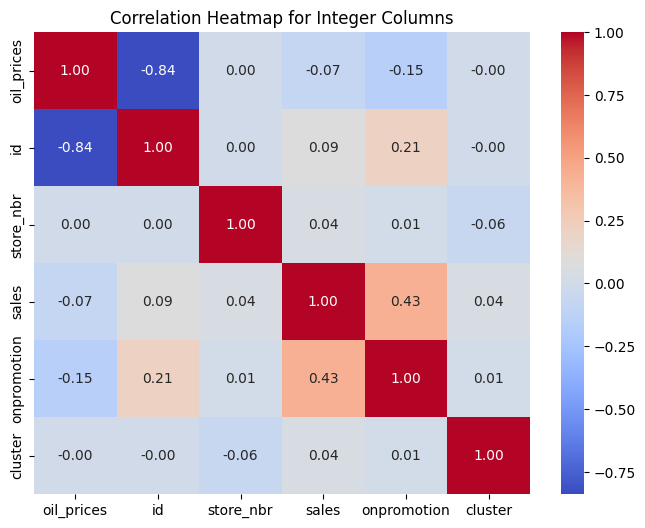

In [81]:
# create a correlation matrix to see which variables are highly correlated
# In general, we want to include variables with high correlation because they are the ones with higher predictive power
# Also gives us an idea on which variables to leave out because they don't affect 'sales' much


# Filter and select only integer columns
integer_columns = clean_train.select_dtypes(include=['int', 'int64', 'int32','float64'])

# Calculate the correlation matrix for the selected integer columns
correlation_matrix = integer_columns.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title('Correlation Heatmap for Integer Columns')
plt.show()

## Hypothesis testing

* Null Hypothesis: Promotions have no significant effect on product sales.
* Alternate Hypothesis:  Promotions positively impact product sales, leading to increased sales during promotional 

In [82]:
# Perform ANOVA
model = ols('sales ~ onpromotion', data=clean_train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if any(anova_table['PR(>F)'] < alpha):
    print('At least one promotion has a significant effect on sales.')
else:
    print('None of the promotions have a significant effect on sales.')

# Print the ANOVA table
print(anova_table)

At least one promotion has a significant effect on sales.
                   sum_sq         df              F  PR(>F)
onpromotion  6.675404e+11        1.0  669344.100728     0.0
Residual     2.983914e+12  2991976.0            NaN     NaN


### Conclusion on hypothesis test
* We reject the null hypothesis and conclude that promotions has significant effect on sales

## Feature Engineering

Here we generate additional features that might improve the model's performance
In the cells below we create three additional columns in both train and test dataset. 
Namely 'Year', 'Month', and 'Day'

In [83]:
# set date as index

clean_train=clean_train.set_index('date')
clean_test=clean_test.set_index('date')

In [84]:
# Train dataset
clean_train['Year']=clean_train.index.year
clean_train['Month']=clean_train.index.month
clean_train['Day']=clean_train.index.day

In [85]:
# Test dataset
clean_test['Year']=clean_test.index.year
clean_test['Month']=clean_test.index.month
clean_test['Day']=clean_test.index.day

## Test for Stationarity
Stationarity is an important concept in time series analysis because it simplifies the modeling and forecasting process and allows for more reliable results. A stationary time series has statistical properties that do not change over time, making it easier to make assumptions about the data and apply various statistical and mathematical techniques. 
* Null hypothesis : Series is stationary
* Alternate Hypothesis: Series is not stationary

<Axes: xlabel='date'>

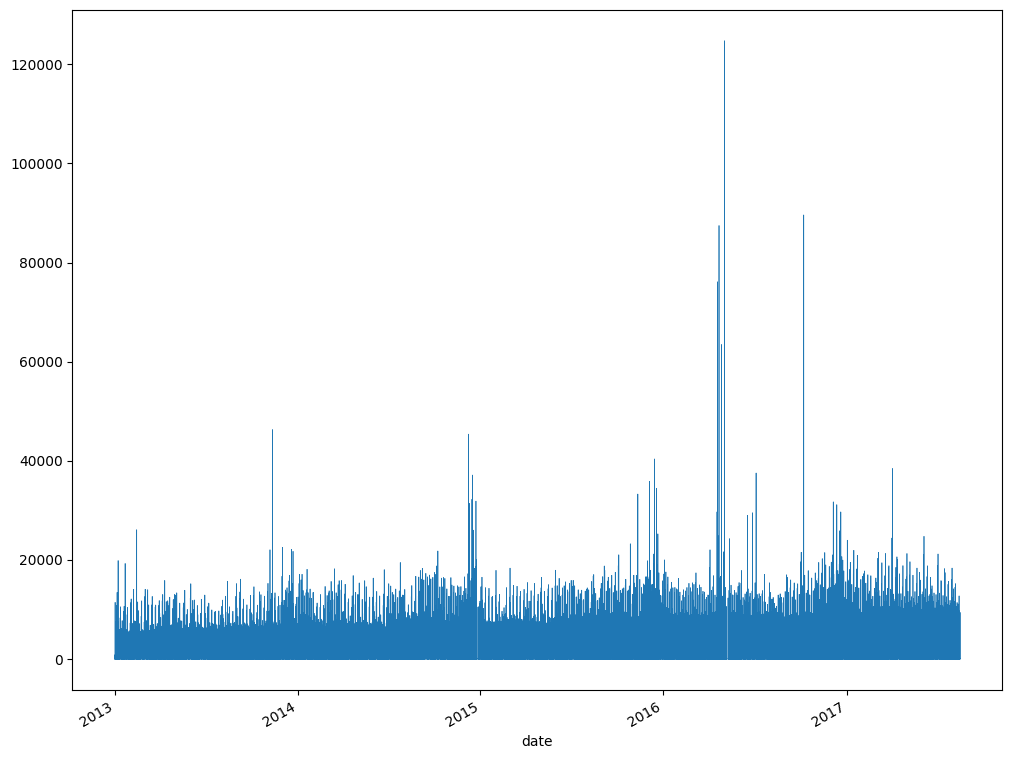

In [86]:
# Visualize data to see pattens of trends and seasonality

plt.figure(figsize=(12,10))
clean_train['sales'].plot(linewidth=0.5)

In [87]:
# drop id column for both train and test
# id column will not play any role in our regression analysis

clean_train = clean_train.drop(columns='id')
clean_test = clean_test.drop(columns='id')

In [88]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991978 entries, 2013-01-01 to 2017-08-15
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   oil_prices   float64
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   type_x       object 
 6   transferred  bool   
 7   city         object 
 8   state        object 
 9   type_y       object 
 10  cluster      int64  
 11  Year         int32  
 12  Month        int32  
 13  Day          int32  
dtypes: bool(1), float64(2), int32(3), int64(3), object(5)
memory usage: 288.2+ MB


In [89]:
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   store_nbr    28512 non-null  int64  
 1   family       28512 non-null  object 
 2   onpromotion  28512 non-null  int64  
 3   oil_prices   28512 non-null  float64
 4   type_x       28512 non-null  object 
 5   transferred  28512 non-null  bool   
 6   city         28512 non-null  object 
 7   state        28512 non-null  object 
 8   type_y       28512 non-null  object 
 9   cluster      28512 non-null  int64  
 10  Year         28512 non-null  int32  
 11  Month        28512 non-null  int32  
 12  Day          28512 non-null  int32  
dtypes: bool(1), float64(1), int32(3), int64(3), object(5)
memory usage: 2.5+ MB


In [90]:
# Check for missing dates in our dataset
# Create a date range covering the entire period of interest

start_date = clean_train.index.min()
end_date = clean_train.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Find missing dates in the index
missing_dates = date_range[~date_range.isin(clean_train.index)]

# Display the missing dates
print(missing_dates)


DatetimeIndex(['2013-06-25', '2013-07-03', '2013-12-25', '2014-07-03',
               '2014-12-25', '2014-12-26', '2015-06-25', '2015-07-03',
               '2015-12-25', '2016-05-07', '2016-05-08', '2016-06-25',
               '2016-07-03', '2016-07-24', '2016-12-25', '2017-04-14',
               '2017-06-25', '2017-07-03'],
              dtype='datetime64[ns]', freq=None)


In [91]:
missing_dates

DatetimeIndex(['2013-06-25', '2013-07-03', '2013-12-25', '2014-07-03',
               '2014-12-25', '2014-12-26', '2015-06-25', '2015-07-03',
               '2015-12-25', '2016-05-07', '2016-05-08', '2016-06-25',
               '2016-07-03', '2016-07-24', '2016-12-25', '2017-04-14',
               '2017-06-25', '2017-07-03'],
              dtype='datetime64[ns]', freq=None)

In [92]:
# Create a DataFrame with missing dates and NaN values
#missing_data = pd.DataFrame(index=missing_dates, columns=clean_train.columns)

# Concatenate the original DataFrame and the missing data DataFrame
#clean_train = pd.concat([clean_train, missing_data])

# Sort the DataFrame by the index (date)
#clean_train = clean_train.sort_index()

# Display the updated DataFrame
#print(clean_train)

In [93]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991978 entries, 2013-01-01 to 2017-08-15
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   oil_prices   float64
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   type_x       object 
 6   transferred  bool   
 7   city         object 
 8   state        object 
 9   type_y       object 
 10  cluster      int64  
 11  Year         int32  
 12  Month        int32  
 13  Day          int32  
dtypes: bool(1), float64(2), int32(3), int64(3), object(5)
memory usage: 288.2+ MB


In [94]:
clean_train.isnull().sum()

oil_prices     0
store_nbr      0
family         0
sales          0
onpromotion    0
type_x         0
transferred    0
city           0
state          0
type_y         0
cluster        0
Year           0
Month          0
Day            0
dtype: int64

In [95]:
# List of column data types you want to interpolate
columns_to_interpolate = ['oil_prices', 'sales', 'onpromotion']

# Loop through each column and interpolate missing values
for column in columns_to_interpolate:
    clean_train[column] = clean_train[column].interpolate(method='linear', limit_direction='both')


In [96]:
# List of column names to interpolate using mode
columns_to_fill_with_mode = ['family','type_x','transferred','city','state','type_y','cluster','store_nbr','onpromotion']

# Loop through each column and fill missing values with the mode
for column in columns_to_fill_with_mode:
    mode_value = clean_train[column].mode().iloc[0]  # Get the mode (most frequent value)
    clean_train[column].fillna(mode_value, inplace=True)

In [97]:
clean_train.isnull().sum()

oil_prices     0
store_nbr      0
family         0
sales          0
onpromotion    0
type_x         0
transferred    0
city           0
state          0
type_y         0
cluster        0
Year           0
Month          0
Day            0
dtype: int64

In [98]:
# specify the data columns to include
clean_train_columns=['onpromotion','oil_prices','sales']

# Resample to weekly frequency, aggregating with mean
clean_train_weekly_mean=clean_train[clean_train_columns].resample('W').mean()
clean_train_weekly_mean.head()

,onpromotion,oil_prices,sales
date,,,
2013-01-06,0.0,93.101668,206.843478
2013-01-13,0.0,93.442856,190.285220
2013-01-20,0.0,94.875714,189.835452
2013-01-27,0.0,95.399999,182.152050
2013-02-03,0.0,97.368572,198.564267


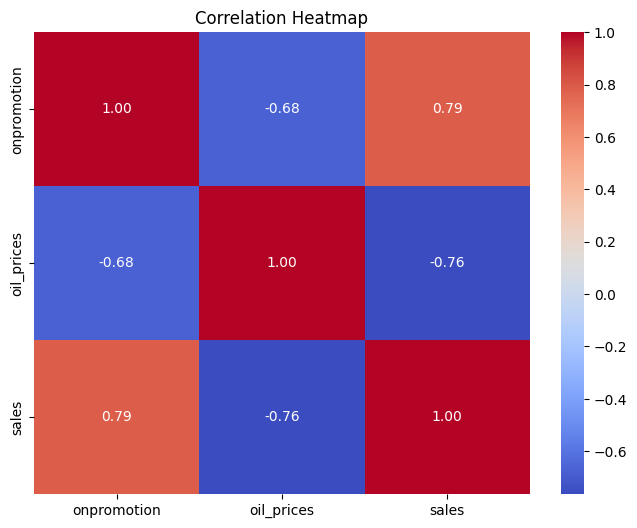

In [99]:
# Calculate the correlation matrix for the aggregated weekly average of oil_prices and sales
correlation_matrix = clean_train_weekly_mean.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='date', ylabel='sales'>

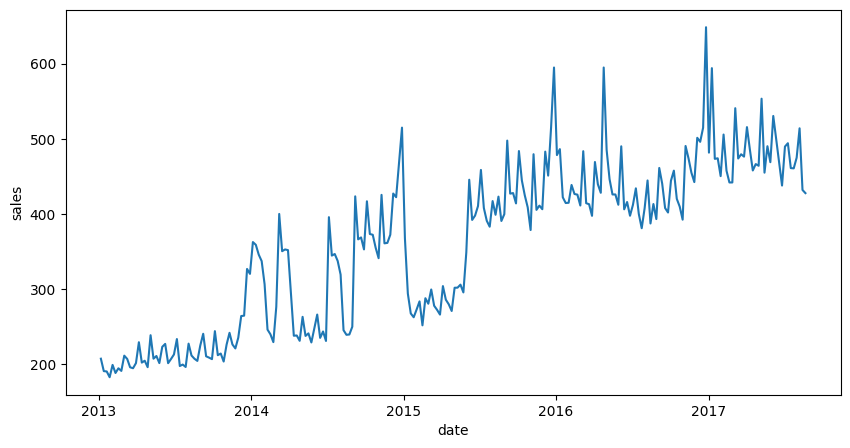

In [100]:
#Visualize the weekly mean over the period

plt.figure(figsize=(10,5))
sns.lineplot(x=clean_train_weekly_mean.index,y=clean_train_weekly_mean['sales'])

In [101]:
# specify the data columns to include
clean_train_columns=['onpromotion','oil_prices','sales']
# Resample to monthly frequency, aggregating with mean
clean_train_monthly_mean=clean_train[clean_train_columns].resample('M').mean()
clean_train_monthly_mean.head()

,onpromotion,oil_prices,sales
date,,,
2013-01-31,0.0,94.640000,186.952405
2013-02-28,0.0,95.416785,193.581846
2013-03-31,0.0,93.210322,206.880581
2013-04-30,0.0,91.793000,205.639071
2013-05-31,0.0,94.703281,210.184563


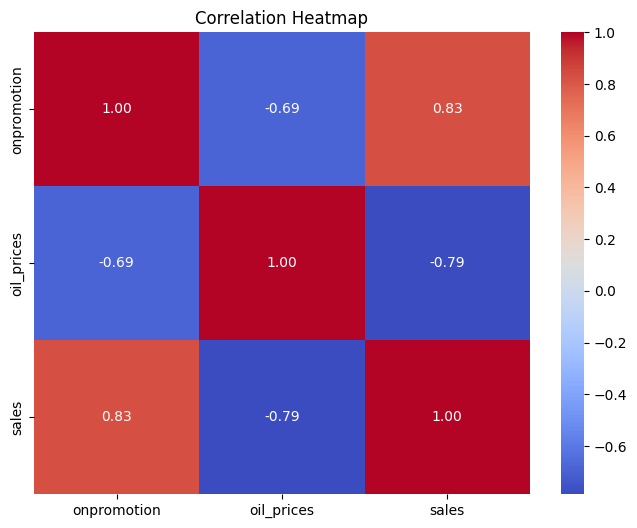

In [102]:
# Calculate the correlation matrix for the aggregated weekly average of oil_prices and sales
correlation_matrix = clean_train_monthly_mean.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='date', ylabel='sales'>

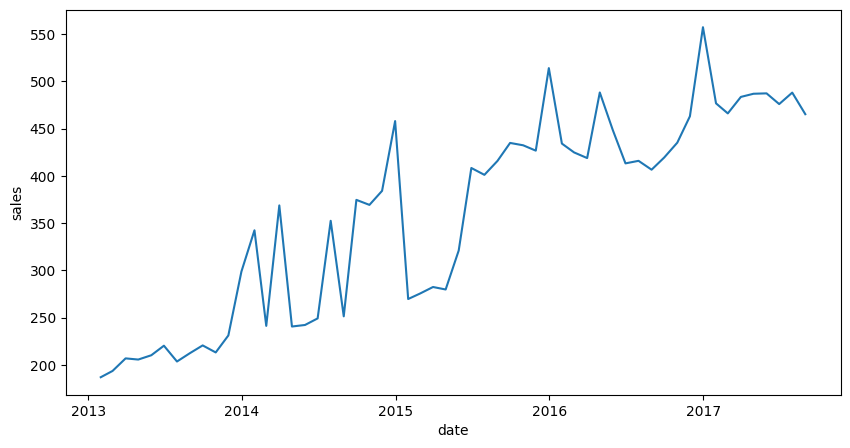

In [103]:
#visualize the monthly mean over the period

plt.figure(figsize=(10,5))
sns.lineplot(x=clean_train_monthly_mean.index,y=clean_train_monthly_mean['sales'])

In [104]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991978 entries, 2013-01-01 to 2017-08-15
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   oil_prices   float64
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   type_x       object 
 6   transferred  bool   
 7   city         object 
 8   state        object 
 9   type_y       object 
 10  cluster      int64  
 11  Year         int32  
 12  Month        int32  
 13  Day          int32  
dtypes: bool(1), float64(2), int32(3), int64(3), object(5)
memory usage: 288.2+ MB


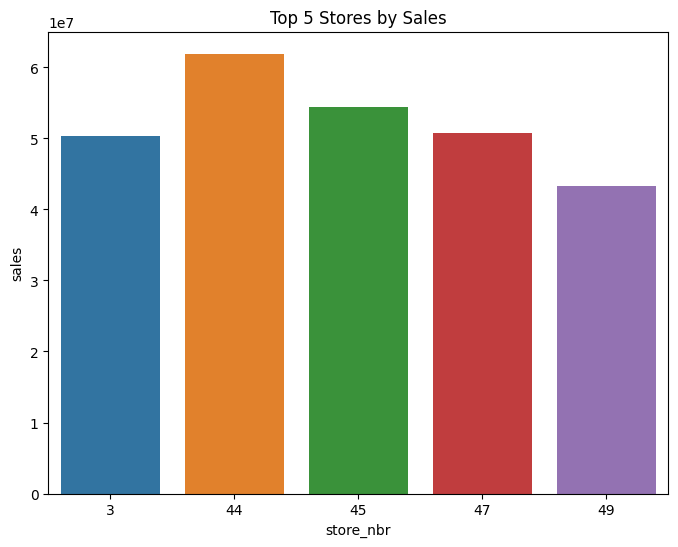

In [105]:
#What are the top five stores in terms of sales?

sales_market=clean_train.groupby('store_nbr')['sales'].sum().reset_index()
# Sort the DataFrame by 'sales' in descending order and pick the top 5
top_5_stores = sales_market.sort_values(by='sales', ascending=False).head(5)


plt.figure(figsize=(8,6))
sns.barplot(data=top_5_stores,x='store_nbr',y='sales')
plt.title('Top 5 Stores by Sales')
plt.show()

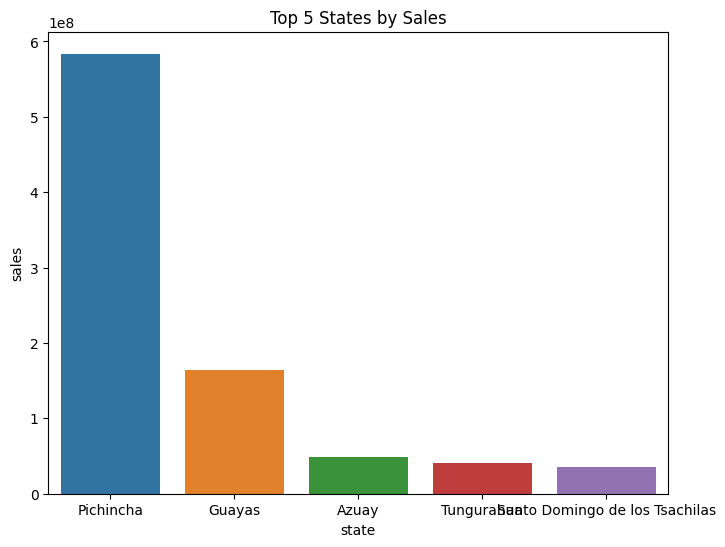

In [106]:
state_sales=clean_train.groupby('state')['sales'].sum().reset_index()
# Sort the DataFrame by 'states' in descending order and pick the top 5
top_5_states = state_sales.sort_values(by='sales', ascending=False).head(5)


plt.figure(figsize=(8,6))
sns.barplot(data=top_5_states,x='state',y='sales')
plt.title('Top 5 States by Sales')
plt.show()

<Axes: xlabel='date', ylabel='sales'>

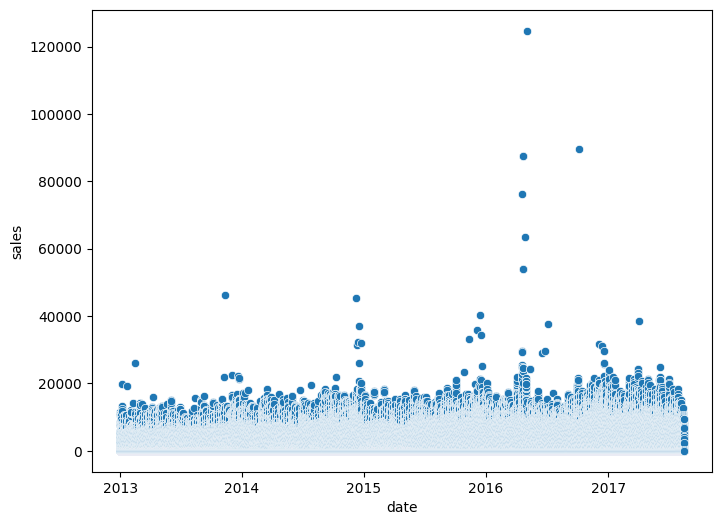

In [107]:
# visualize the sales in train dataset

plt.figure(figsize=(8,6))
sns.scatterplot(clean_train['sales'])

<Axes: xlabel='date', ylabel='sales'>

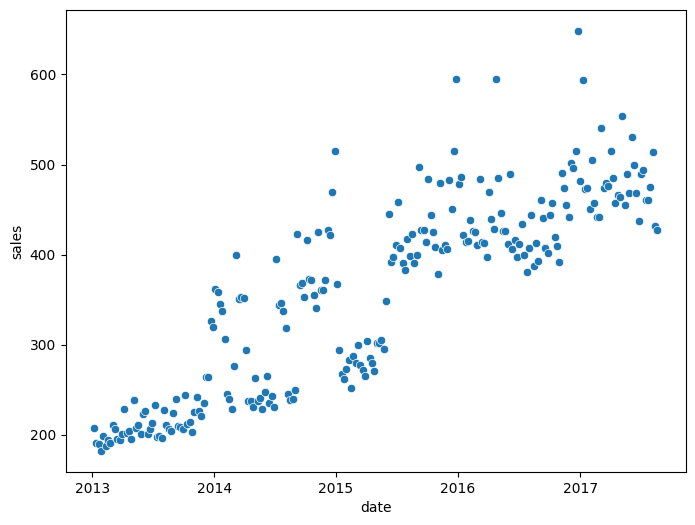

In [108]:
#visualize the weekly mean sales

plt.figure(figsize=(8,6))
sns.scatterplot(clean_train_weekly_mean['sales'])

<Axes: xlabel='date', ylabel='sales'>

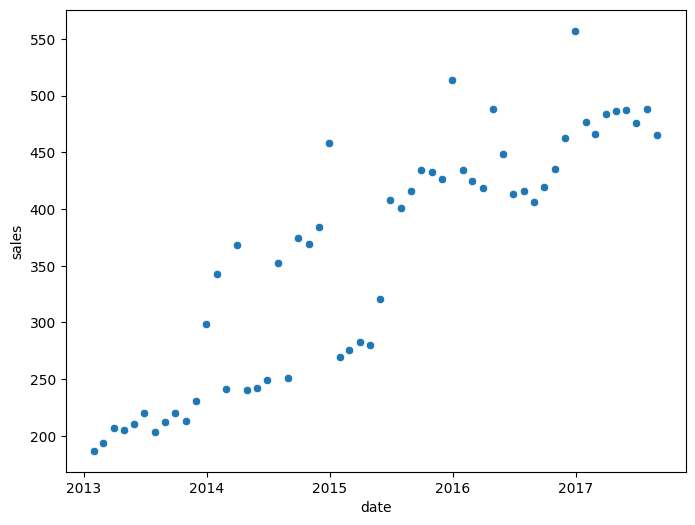

In [109]:
#visualize the monthly mean sales

plt.figure(figsize=(8,6))
sns.scatterplot(clean_train_monthly_mean['sales'])

In [110]:
#Preview the train dataset

clean_train.head()

,oil_prices,store_nbr,family,sales,onpromotion,type_x,transferred,city,state,type_y,cluster,Year,Month,Day
date,,,,,,,,,,,,,,
2013-01-01,93.139999,1,AUTOMOTIVE,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BABY CARE,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BEAUTY,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BEVERAGES,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BOOKS,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1


In [111]:
# rename 'type_x' to 'IsHoliday' for easy understanding

clean_train=clean_train.rename(columns={'type_x':'IsHoliday'})
clean_train.head()

,oil_prices,store_nbr,family,sales,onpromotion,IsHoliday,transferred,city,state,type_y,cluster,Year,Month,Day
date,,,,,,,,,,,,,,
2013-01-01,93.139999,1,AUTOMOTIVE,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BABY CARE,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BEAUTY,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BEVERAGES,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BOOKS,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1


In [112]:
#Rename 'family', 'transferred', and 'cluster' to 'ProductCategory', Holiday_transferred', and 'store_cluster' respectively

clean_train=clean_train.rename(columns={'family':'ProductCategory'})
clean_train=clean_train.rename(columns={'transferred':'Holiday_transferred'})
clean_train=clean_train.rename(columns={'cluster':'store_cluster'})
clean_train.head()

,oil_prices,store_nbr,ProductCategory,sales,onpromotion,IsHoliday,Holiday_transferred,city,state,type_y,store_cluster,Year,Month,Day
date,,,,,,,,,,,,,,
2013-01-01,93.139999,1,AUTOMOTIVE,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BABY CARE,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BEAUTY,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BEVERAGES,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2013-01-01,93.139999,1,BOOKS,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1


In [113]:
#Repeat the above renaming for the test dataset as well

clean_test=clean_test.rename(columns={'type_x':'IsHoliday'})
clean_test=clean_test.rename(columns={'family':'ProductCategory'})
clean_test=clean_test.rename(columns={'transferred':'Holiday_transferred'})
clean_test=clean_test.rename(columns={'cluster':'store_cluster'})
clean_test.head()

,store_nbr,ProductCategory,onpromotion,oil_prices,IsHoliday,Holiday_transferred,city,state,type_y,store_cluster,Year,Month,Day
date,,,,,,,,,,,,,
2017-08-16,1,AUTOMOTIVE,0,46.799999,not holiday,False,Quito,Pichincha,D,13,2017,8,16
2017-08-16,1,BABY CARE,0,46.799999,not holiday,False,Quito,Pichincha,D,13,2017,8,16
2017-08-16,1,BEAUTY,2,46.799999,not holiday,False,Quito,Pichincha,D,13,2017,8,16
2017-08-16,1,BEVERAGES,20,46.799999,not holiday,False,Quito,Pichincha,D,13,2017,8,16
2017-08-16,1,BOOKS,0,46.799999,not holiday,False,Quito,Pichincha,D,13,2017,8,16


### Stationarity test using KPSS
The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test is a statistical test used in time series analysis to check the stationarity of a time series data set. Unlike the Augmented Dickey-Fuller (ADF) test, which tests for a unit root (non-stationarity), the KPSS test is designed to test for stationarity around a deterministic trend. In other words, it helps determine if a time series is stationary in levels (around a constant mean) or if it has a deterministic trend.

In [114]:
# test stationarity using KPSS test

stats, p, lags, critical_values = kpss(clean_train['sales'], 'ct')

print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critical Values: {critical_values}')

if p < 0.05 :
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics: 1.1179537557317383
p-value: 0.01
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


<Axes: xlabel='date', ylabel='sales'>

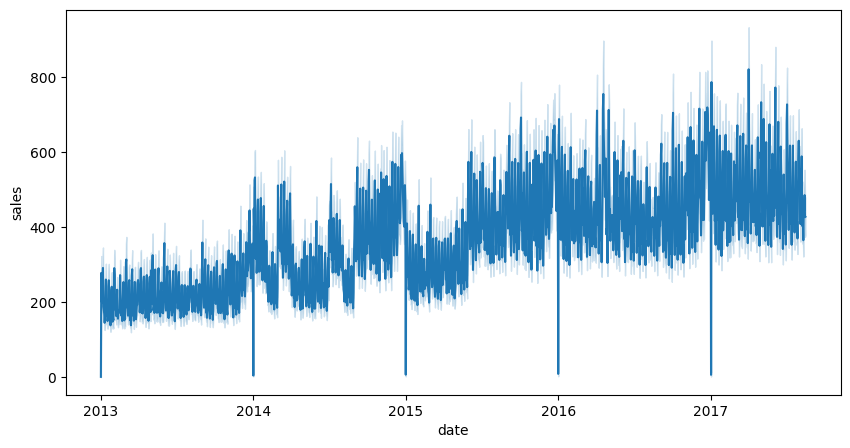

In [115]:
plt.figure(figsize=(10,5))
sns.lineplot(x=clean_train.index,y=clean_train['sales'])

### Decomposition
Time series decomposition is a statistical technique used to break down a time series into its underlying components. These components help us understand the various patterns and behaviors within a time series, making it easier to analyze, model, and forecast.

In [116]:
# Perform additive decomposition

result_add = seasonal_decompose(clean_train.groupby(clean_train.index)['sales'].sum(), model='additive', extrapolate_trend='freq', period=12)

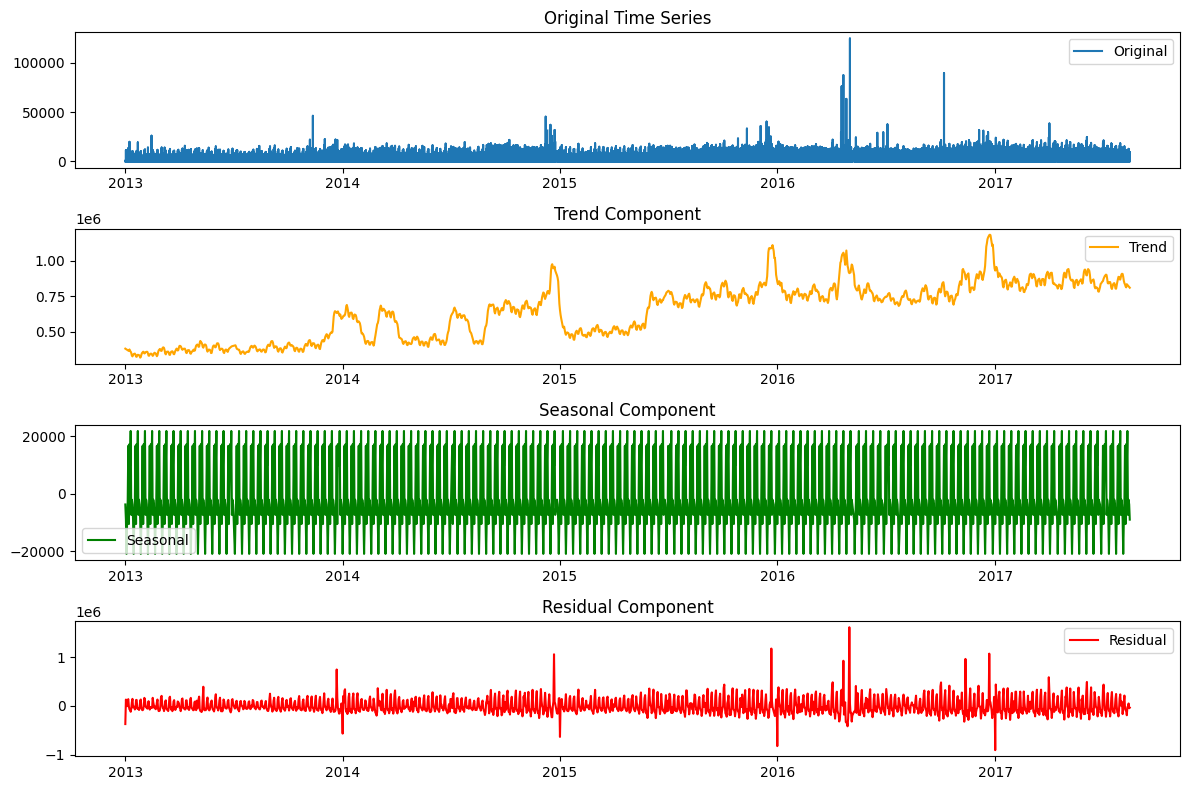

In [117]:
# Plot the original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)  # 4 rows, 1 column, 1st subplot
plt.plot(clean_train.index, clean_train['sales'], label='Original')
plt.title('Original Time Series')
plt.legend()

# Plot the trend component
plt.subplot(412)  # 4 rows, 1 column, 2nd subplot
plt.plot(result_add.trend.index, result_add.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

# Plot the seasonal component
plt.subplot(413)  # 4 rows, 1 column, 3rd subplot
plt.plot(result_add.seasonal.index, result_add.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend()

# Plot the residual component
plt.subplot(414)  # 4 rows, 1 column, 4th subplot
plt.plot(result_add.resid.index, result_add.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From the components plotted above, the trend of sales is clearly observed. The residuals show periods of high variability on sales.

Seasonal Component: although not clearly observed, it can be observed in the plot "Seasonal" that there are patterns that seems to be repeating over time. A further statistical test will be employed to confirm the seasonality of the sales.

Trend Component: The trend is clearly observed in the plot "Trend" with a that line shows a gradual increase in sales over time.

Residual Component: Residuals are what remains in your data after the trend and seasonality have been removed. It represents the random noise or fluctuations as shown in the plot. They capture irregularities or deviations from the expected trend and seasonality.

The use of an additive model assumes that these components (trend, seasonality, and residuals) can be combined in a straightforward manner to recreate the original time series values (in this case, sales data). This assumption implies that the interactions between these components are linear, meaning their effects can be summed together to reproduce the observed data.

In [118]:
# take the first Differencing
# Fill missing data with 1

clean_train['sales_diff'] = clean_train['sales'].diff().fillna(1)



In [119]:
# test stationarity of first differenced sales [sales_diff] using KPSS test

stats, p, lags, critical_values = kpss(clean_train['sales_diff'], 'ct')

print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critical Values: {critical_values}')

if p < 0.05 :
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics: 0.00011389440519556371
p-value: 0.1
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is Stationary


<Axes: xlabel='date', ylabel='sales_diff'>

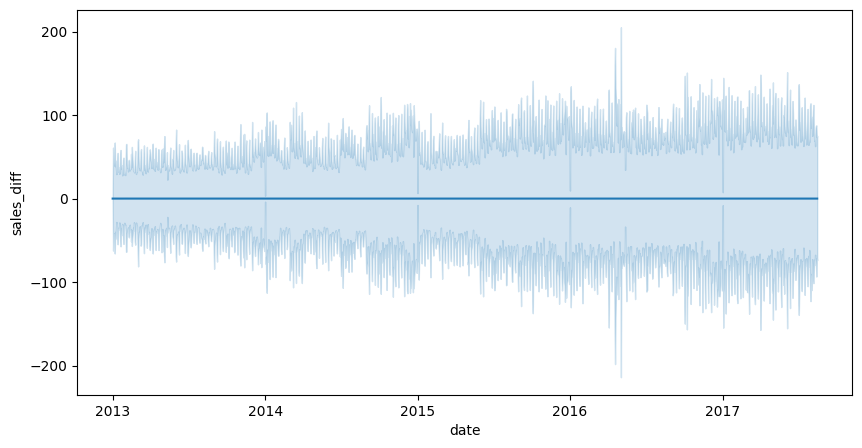

In [120]:
plt.figure(figsize=(10,5))
sns.lineplot(x=clean_train.index,y=clean_train['sales_diff'])

In [121]:
# Check if the index (date) is sorted before I split train and validation dataset
is_sorted = clean_train['sales_diff'].index.is_monotonic_increasing

# Print the result
if is_sorted:
    print("The index (date) is sorted.")
else:
    print("The index (date) is not sorted.")

The index (date) is sorted.


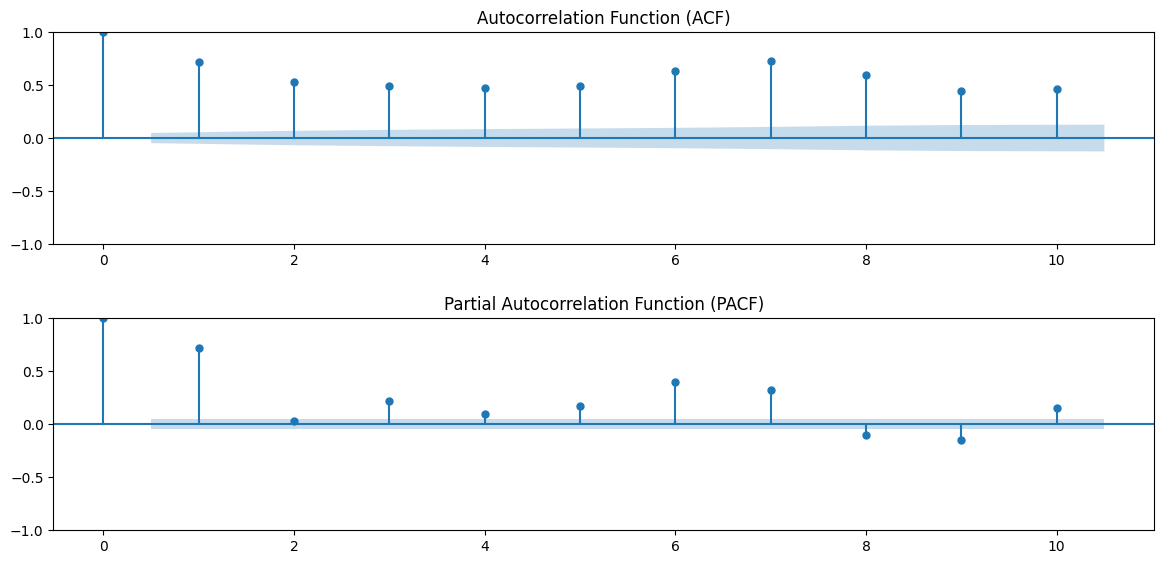

In [122]:
# Get the sales time series data based on the sample
ts = clean_train.groupby(clean_train.index)['sales'].sum()

# Create subplots with 2 rows and 1 column, specifying figsize
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot the Autocorrelation Function (ACF) on the first subplot (ax1)
sm.graphics.tsa.plot_acf(ts, lags=10, ax=ax1)
ax1.set_title("Autocorrelation Function (ACF)")  # Add a title to the first subplot

# Plot the Partial Autocorrelation Function (PACF) on the second subplot (ax2)
sm.graphics.tsa.plot_pacf(ts, lags=10, ax=ax2)
ax2.set_title("Partial Autocorrelation Function (PACF)")  # Add a title to the second subplot

# Add padding between the two subplots for better visualization
plt.tight_layout(pad=2.0)

# Display the plots
plt.show()

### Data Sampling
The data points in the dataset are over 3 million an as we are limited by computational resources, we will sample and work with only 40% as our current system cannot handle the entire dataset.

In [123]:
# Define a function to perform the sampling
def train_sample(df, size):
    """
    Randomly samples rows from a DataFrame.

    Parameters:
     df (pd.DataFrame): DataFrame from which to sample.
     size (float): The proportion of rows to sample.

    Returns:
     pd.DataFrame: A sampled subset of DataFrame.
    """
    # Set a seed for reproducibility
    random.seed(42)

    # Calculate the number of rows to sample based on the specified size
    sample_size = int(size * len(df))

    # select rows randomly to create a sample
    sampled_data = df.sample(n=sample_size)

    return sampled_data

In [124]:
# Apply the function to sample the 40%

sampled_train = train_sample(clean_train, 0.4)
sampled_train.shape

(1196791, 15)

In [125]:
# sort sampled_train dates

sampled_train= sampled_train.sort_index()
sampled_train.head()

,oil_prices,store_nbr,ProductCategory,sales,onpromotion,IsHoliday,Holiday_transferred,city,state,type_y,store_cluster,Year,Month,Day,sales_diff
date,,,,,,,,,,,,,,,
2013-01-01,93.139999,3,PET SUPPLIES,0.0,0,Holiday,False,Quito,Pichincha,D,8,2013,1,1,0.0
2013-01-01,93.139999,32,BEAUTY,0.0,0,Holiday,False,Guayaquil,Guayas,C,3,2013,1,1,0.0
2013-01-01,93.139999,35,SCHOOL AND OFFICE SUPPLIES,0.0,0,Holiday,False,Playas,Guayas,C,3,2013,1,1,0.0
2013-01-01,93.139999,2,LAWN AND GARDEN,0.0,0,Holiday,False,Quito,Pichincha,D,13,2013,1,1,0.0
2013-01-01,93.139999,51,HOME CARE,0.0,0,Holiday,False,Guayaquil,Guayas,A,17,2013,1,1,0.0


## Machine Learning Models
Modern machine learning models like decision trees, random forests, gradient boosting, and neural networks can be used for time series forecasting. These models can capture complex relationships in the data but may require more data and computational resources. 

### Feature Encoding
It involves transforming categorical and textual data into a numerical format that can be fed into statistical models and machine learning algorithms.

In [126]:
sampled_train.columns

Index(['oil_prices', 'store_nbr', 'ProductCategory', 'sales', 'onpromotion',
       'IsHoliday', 'Holiday_transferred', 'city', 'state', 'type_y',
       'store_cluster', 'Year', 'Month', 'Day', 'sales_diff'],
      dtype='object')

In [127]:
clean_test.columns

Index(['store_nbr', 'ProductCategory', 'onpromotion', 'oil_prices',
       'IsHoliday', 'Holiday_transferred', 'city', 'state', 'type_y',
       'store_cluster', 'Year', 'Month', 'Day'],
      dtype='object')

In [128]:
sampled_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1196791 entries, 2013-01-01 to 2017-08-15
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   oil_prices           1196791 non-null  float64
 1   store_nbr            1196791 non-null  int64  
 2   ProductCategory      1196791 non-null  object 
 3   sales                1196791 non-null  float64
 4   onpromotion          1196791 non-null  int64  
 5   IsHoliday            1196791 non-null  object 
 6   Holiday_transferred  1196791 non-null  bool   
 7   city                 1196791 non-null  object 
 8   state                1196791 non-null  object 
 9   type_y               1196791 non-null  object 
 10  store_cluster        1196791 non-null  int64  
 11  Year                 1196791 non-null  int32  
 12  Month                1196791 non-null  int32  
 13  Day                  1196791 non-null  int32  
 14  sales_diff           1196791 non-nu

In [129]:
# Specify the categorical columns to one-hot encode
train_columns = ['ProductCategory', 'city', 'state', 'type_y','IsHoliday','Holiday_transferred']

# Perform one-hot encoding
encoded_train = pd.get_dummies(sampled_train, columns=train_columns)

# Get a list of columns that were not one-hot encoded
remaining_columns = [col for col in sampled_train.columns if col not in train_columns]

# Add the remaining columns to the encoded_train DataFrame
for col in remaining_columns:
    encoded_train[col] = sampled_train[col]

# Display the updated DataFrame with one-hot encoding and the remaining columns
print(encoded_train)

            oil_prices  store_nbr     sales  onpromotion  store_cluster  Year  \
date                                                                            
2013-01-01   93.139999          3     0.000            0              8  2013   
2013-01-01   93.139999         32     0.000            0              3  2013   
2013-01-01   93.139999         35     0.000            0              3  2013   
2013-01-01   93.139999          2     0.000            0             13  2013   
2013-01-01   93.139999         51     0.000            0             17  2013   
...                ...        ...       ...          ...            ...   ...   
2017-08-15   47.570000          9    16.000            0              6  2017   
2017-08-15   47.570000         46  2155.659            8             14  2017   
2017-08-15   47.570000         24    35.914            0              1  2017   
2017-08-15   47.570000         54   202.000            7              3  2017   
2017-08-15   47.570000      

In [130]:
encoded_train.head()

,oil_prices,store_nbr,sales,onpromotion,store_cluster,Year,Month,Day,sales_diff,ProductCategory_AUTOMOTIVE,...,state_Tungurahua,type_y_A,type_y_B,type_y_C,type_y_D,type_y_E,IsHoliday_Holiday,IsHoliday_not holiday,Holiday_transferred_False,Holiday_transferred_True
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,93.139999,3,0.0,0,8,2013,1,1,0.0,False,...,False,False,False,False,True,False,True,False,True,False
2013-01-01,93.139999,32,0.0,0,3,2013,1,1,0.0,False,...,False,False,False,True,False,False,True,False,True,False
2013-01-01,93.139999,35,0.0,0,3,2013,1,1,0.0,False,...,False,False,False,True,False,False,True,False,True,False
2013-01-01,93.139999,2,0.0,0,13,2013,1,1,0.0,False,...,False,False,False,False,True,False,True,False,True,False
2013-01-01,93.139999,51,0.0,0,17,2013,1,1,0.0,False,...,False,True,False,False,False,False,True,False,True,False


### Encoding test

In [131]:
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_nbr            28512 non-null  int64  
 1   ProductCategory      28512 non-null  object 
 2   onpromotion          28512 non-null  int64  
 3   oil_prices           28512 non-null  float64
 4   IsHoliday            28512 non-null  object 
 5   Holiday_transferred  28512 non-null  bool   
 6   city                 28512 non-null  object 
 7   state                28512 non-null  object 
 8   type_y               28512 non-null  object 
 9   store_cluster        28512 non-null  int64  
 10  Year                 28512 non-null  int32  
 11  Month                28512 non-null  int32  
 12  Day                  28512 non-null  int32  
dtypes: bool(1), float64(1), int32(3), int64(3), object(5)
memory usage: 2.5+ MB


In [132]:
# Specify the categorical columns to one-hot encode
test_columns = ['ProductCategory', 'city', 'state', 'type_y','IsHoliday','Holiday_transferred']

# Perform one-hot encoding
encoded_test = pd.get_dummies(clean_test, columns=test_columns)

# Get a list of columns that were not one-hot encoded
remaining_columns = [col for col in clean_test.columns if col not in test_columns]

# Add the remaining columns to the encoded_train DataFrame
for col in remaining_columns:
    encoded_test[col] = clean_test[col]

# Display the updated DataFrame with one-hot encoding and the remaining columns
print(encoded_test.head())

            store_nbr  onpromotion  oil_prices  store_cluster  Year  Month  \
date                                                                         
2017-08-16          1            0   46.799999             13  2017      8   
2017-08-16          1            0   46.799999             13  2017      8   
2017-08-16          1            2   46.799999             13  2017      8   
2017-08-16          1           20   46.799999             13  2017      8   
2017-08-16          1            0   46.799999             13  2017      8   

            Day  ProductCategory_AUTOMOTIVE  ProductCategory_BABY CARE  \
date                                                                     
2017-08-16   16                        True                      False   
2017-08-16   16                       False                       True   
2017-08-16   16                       False                      False   
2017-08-16   16                       False                      False   
2017-08-1

In [133]:
encoded_test.head()

,store_nbr,onpromotion,oil_prices,store_cluster,Year,Month,Day,ProductCategory_AUTOMOTIVE,ProductCategory_BABY CARE,ProductCategory_BEAUTY,...,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_y_A,type_y_B,type_y_C,type_y_D,type_y_E,IsHoliday_Holiday,IsHoliday_not holiday,Holiday_transferred_False
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,1,0,46.799999,13,2017,8,16,True,False,False,...,False,False,False,False,False,True,False,False,True,True
2017-08-16,1,0,46.799999,13,2017,8,16,False,True,False,...,False,False,False,False,False,True,False,False,True,True
2017-08-16,1,2,46.799999,13,2017,8,16,False,False,True,...,False,False,False,False,False,True,False,False,True,True
2017-08-16,1,20,46.799999,13,2017,8,16,False,False,False,...,False,False,False,False,False,True,False,False,True,True
2017-08-16,1,0,46.799999,13,2017,8,16,False,False,False,...,False,False,False,False,False,True,False,False,True,True


In [134]:
encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 86 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   store_nbr                                   28512 non-null  int64  
 1   onpromotion                                 28512 non-null  int64  
 2   oil_prices                                  28512 non-null  float64
 3   store_cluster                               28512 non-null  int64  
 4   Year                                        28512 non-null  int32  
 5   Month                                       28512 non-null  int32  
 6   Day                                         28512 non-null  int32  
 7   ProductCategory_AUTOMOTIVE                  28512 non-null  bool   
 8   ProductCategory_BABY CARE                   28512 non-null  bool   
 9   ProductCategory_BEAUTY                      28512 non-null  bool  

In [135]:
encoded_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1196791 entries, 2013-01-01 to 2017-08-15
Data columns (total 89 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   oil_prices                                  1196791 non-null  float64
 1   store_nbr                                   1196791 non-null  int64  
 2   sales                                       1196791 non-null  float64
 3   onpromotion                                 1196791 non-null  int64  
 4   store_cluster                               1196791 non-null  int64  
 5   Year                                        1196791 non-null  int32  
 6   Month                                       1196791 non-null  int32  
 7   Day                                         1196791 non-null  int32  
 8   sales_diff                                  1196791 non-null  float64
 9   ProductCategory_AUTOMOTIVE                

In [136]:
# Convert int64 to int32 due to memory capacity
encoded_train['store_cluster'] = encoded_train['store_cluster'].astype('int32')
encoded_test['store_cluster'] = encoded_test['store_cluster'].astype('int32')
encoded_test['store_nbr'] = encoded_test['store_nbr'].astype('int32')
encoded_train['store_nbr'] = encoded_train['store_nbr'].astype('int32')
encoded_test['onpromotion'] = encoded_test['onpromotion'].astype('int32')
encoded_train['onpromotion'] = encoded_train['onpromotion'].astype('int32')
# Convert float64 to float32
encoded_train['sales'] = encoded_train['sales'].astype('float32')
encoded_train['oil_prices'] = encoded_train['oil_prices'].astype('float32')
encoded_test['oil_prices'] = encoded_test['oil_prices'].astype('float32')

In [137]:
# drop the sales columns as we have now differenced the sales
encoded_train.drop('sales', axis=1, inplace= True)

In [138]:
# calculates the minimum value in the 'sales' column
# then subtracts the minimum value found in step 1 from every value in the 'sales' column and then adds 1 to each of these values.
encoded_train['sales_diff'] = encoded_train['sales_diff'] - encoded_train['sales_diff'].min() + 1

By subtracting the minimum value and adding 1, we ensure that the minimum value in the 'sales' column is 1. This is useful as we are working with certain models or algorithms that require positive input values.The addition of 1 is like adding a constant offset to all values. It doesn't change the relative differences between values.

Modelling

In [139]:
encoded_train.shape

(1196791, 88)

In [140]:
## splitting data to train and evalution
train_data = encoded_train[:1000000]
eval = encoded_train[1000000:]

In [141]:
# Training data 
y_train=train_data["sales_diff"]
X_train = train_data.drop(columns = ["sales_diff"])

# evaluating data 
y_eval = eval["sales_diff"]
X_eval = eval.drop(columns = ["sales_diff"])

In [142]:
y_train.shape

(1000000,)

### Model Training
here we create instances of different models (Random Forest and Decision Tree Regressors) and add them to the models dictionary. Then, we loop through each model, train it on the training data, evaluate it on the evaluation data, and print their evaluation metrics, which include MSE, RMSE and RMSLE.

In [143]:
# Create an instance of the RandomForestRegressor
rf= RandomForestRegressor(random_state=42) 
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_eval)
mse= mean_squared_error(y_eval, rf_pred)
rmse = np.sqrt(mse)
rmsle = np.sqrt(mean_squared_log_error(y_eval, rf_pred))
print(mse)
print(rmse)
print(rmsle)

556895.4048733157
746.2542494842597
0.012146608657668928


### Decision Tree Regressor

In [144]:
# Create an instance of the Decision Trees
dt= DecisionTreeRegressor(random_state=42) 
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_eval)
mse= mean_squared_error(y_eval, dt_pred)
print(mse)


917794.7314868771


In [145]:
rmse = np.sqrt(mse)
rmsle = np.sqrt(mean_squared_log_error(y_eval, rf_pred))
print(rmse)
print(rmsle)

958.016039263893
0.012146608657668928


In [146]:
# Linear Regression
# Decision Tree
# 

## Traditional Statistical Models

In [147]:
# group the data by date and average sales for stat models
data = train_data.groupby(train_data.index)['sales_diff'].sum().reset_index()
eval = eval.groupby(eval.index)['sales_diff'].sum().reset_index()


### Auto Regression

In [148]:
# setting first name as index column
data.set_index('date', inplace=True)
eval.set_index('date', inplace=True)

In [149]:
model= AutoReg(data, lags=10).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             sales_diff   No. Observations:                 1396
Model:                    AutoReg(10)   Log Likelihood              -22814.107
Method:               Conditional MLE   S.D. of innovations        3407386.564
Date:                Sat, 30 Sep 2023   AIC                          45652.214
Time:                        17:44:12   BIC                          45715.024
Sample:                            10   HQIC                         45675.706
                                 1396                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            3.49e+07   3.92e+06      8.902      0.000    2.72e+07    4.26e+07
sales_diff.L1     -0.0207      0.027     -0.764      0.445      -0.074       0.032
sales_diff.L2     -0.0314      0.027     -1.171      0.242      -0.084       0.021
sales_diff.L3     -0.0151      0.027     -0.562      0.574      -0.068       0.037
sales_diff.L4     -0.0020      0.027     -0.074      0.941      -0.055       0.051
sales_diff.L5     -0.0038      0.027     -0.140      0.888      -0.056       0.049
sales_diff.L6      0.0231      0.027      0.862      0.389      -0.029       0.076
sales_diff.L7      0.0137      0.027      0.513      0.608      -0.039       0.066
sales_diff.L8     -0.0118      0.027     -0.439      0.661      -0.064       0.041
sales_diff.L9      0.1389      0.027      5.183      0.000       0.086       0.191
sales_diff.L10     0.1407      0.027      5.201      0.000       0.088       0.194
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.1486           -0.0000j            1.1486           -0.0000
AR.2             0.9075           -0.7206j            1.1588           -0.1068
AR.3             0.9075           +0.7206j            1.1588            0.1068
AR.4             0.3042           -1.1286j            1.1689           -0.2081
AR.5             0.3042           +1.1286j            1.1689            0.2081
AR.6            -0.4614           -1.1031j            1.1957           -0.3130
AR.7            -0.4614           +1.1031j            1.1957            0.3130
AR.8            -1.1220           -0.6600j            1.3018           -0.4154
AR.9            -1.1220           +0.6600j            1.3018            0.4154
AR.10           -1.3916           -0.0000j            1.3916           -0.5000
------------------------------------------------------------------------------
"""

In [150]:
# make predictions on eval data
AR_pred=model.predict(start=len(data),
                      end=len(data)+len(eval)-1,
                      dynamic = False
                      )

In [151]:
# evaluate our models
mse= mean_squared_error(eval, AR_pred)
msle=mean_squared_log_error(eval, AR_pred)
rmse= np.sqrt(mean_squared_error(eval, AR_pred)).round(2)
rmsle= np.sqrt(mean_squared_log_error(eval, AR_pred)).round(2)

results=pd.DataFrame([['AR',mse, msle, rmse, rmsle]], columns= ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results

,Model,MSE,MSLE,RMSE,RMSLE
0,AR,1.801619e+13,0.00582,4244548.06,0.08


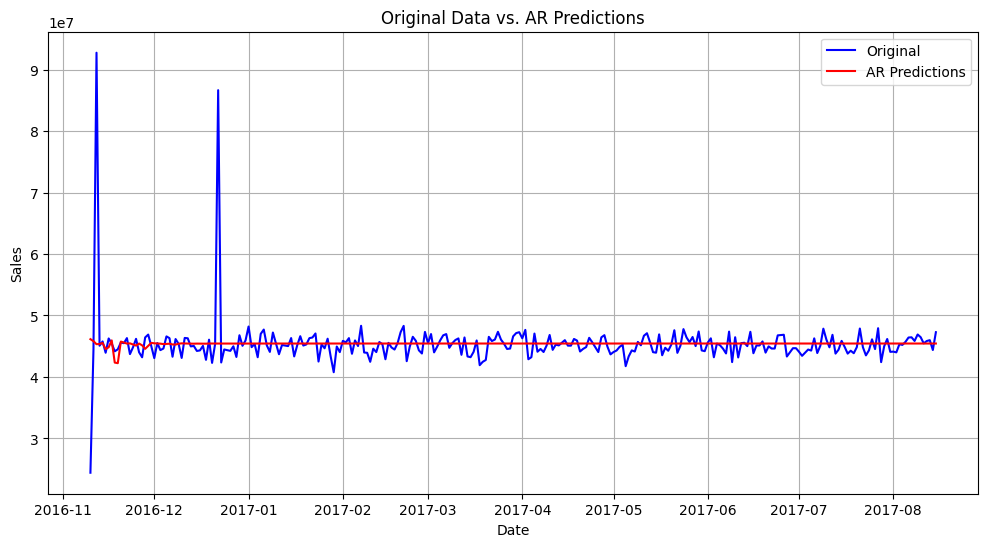

In [152]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the original data
plt.plot(eval.index, eval.values, label='Original', color='blue')

# Plot the AR predictions
plt.plot(eval.index, AR_pred, label='AR Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Data vs. AR Predictions')
plt.legend()
plt.grid(True)

plt.show()

### SARIMA MODEL
An SARIMA (Seasonal AutoRegressive Integrated Moving Average) model is a time series forecasting model that captures both autoregressive (AR), differencing (I), and moving average (MA) components, along with seasonality.

In [153]:
# Create the SARIMA model
sarima_model = sm.tsa.SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
model_fit= sarima_model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         sales_diff   No. Observations:                 1396
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood              -23042.591
Date:                            Sat, 30 Sep 2023   AIC                          46095.182
Time:                                    17:44:14   BIC                          46121.385
Sample:                                         0   HQIC                         46104.979
                                           - 1396                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0181      0.035      0.523      0.601      -0.050       0.086
ma.L1         -0.9824      0.005   -182.317      0.000      -0.993      -0.972
ar.S.L12       0.5355      1.241      0.432      0.666      -1.896       2.967
ma.S.L12      -0.5645      1.211     -0.466      0.641      -2.939       1.810
sigma2      1.509e+13   4.08e-12    3.7e+24      0.000    1.51e+13    1.51e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):            795589.62
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                             9.34
Prob(H) (two-sided):                  0.00   Kurtosis:                       118.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.89e+40. Standard errors may be unstable.
"""

In [154]:
# make predictions on the eval data
SARIMA_pred=model_fit.predict(start=len(data),
                      end=len(data)+len(eval)-1,
                      type = 'levels'
                      )

In [155]:
# evaluate our models
mse= mean_squared_error(eval, SARIMA_pred)
msle=mean_squared_log_error(eval, SARIMA_pred)
rmse= np.sqrt(mean_squared_error(eval, SARIMA_pred)).round(2)
rmsle= np.sqrt(mean_squared_log_error(eval, SARIMA_pred)).round(2)

results=pd.DataFrame([['SARIMA',mse, msle, rmse, rmsle]], columns= ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results

,Model,MSE,MSLE,RMSE,RMSLE
0,SARIMA,1.800177e+13,0.005713,4242848.72,0.08


### ARIMA Model

In [156]:
# Get the sales time series data based on the sample
data_sales = encoded_train.groupby(encoded_train.index)['sales_diff'].sum()

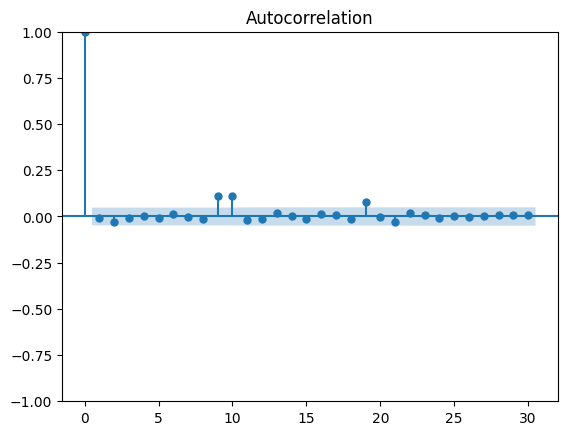

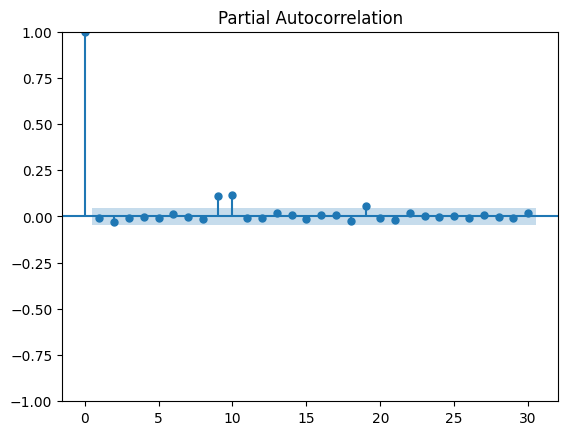

In [157]:
# Determine the order of the ARIMA model (p, d, q) based on ACF and PACF plots
# Plot ACF and PACF
plot_acf(data_sales, lags=30)
plot_pacf(data_sales, lags=30)
plt.show()

In [158]:
# Build and train the ARIMA model
model = ARIMA(data, order=(9, 1, 9))
results = model.fit()

In [159]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             sales_diff   No. Observations:                 1396
Model:                 ARIMA(9, 1, 9)   Log Likelihood              -23013.703
Date:                Sat, 30 Sep 2023   AIC                          46065.406
Time:                        17:44:20   BIC                          46164.978
Sample:                             0   HQIC                         46102.635
                               - 1396                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8904      0.354     -2.518      0.012      -1.583      -0.197
ar.L2         -1.0405      0.250     -4.158      0.000      -1.531      -0.550
ar.L3         -0.8598      0.370     -2.322      0.020      -1.586      -0.134
ar.L4         -0.8355      0.330     -2.533      0.011      -1.482      -0.189
ar.L5         -0.7314      0.299     -2.443      0.015      -1.318      -0.145
ar.L6         -0.7479      0.324     -2.306      0.021      -1.384      -0.112
ar.L7         -0.5196      0.202     -2.569      0.010      -0.916      -0.123
ar.L8         -0.6441      0.194     -3.322      0.001      -1.024      -0.264
ar.L9         -0.0953      0.047     -2.015      0.044      -0.188      -0.003
ma.L1         -0.0792      0.356     -0.223      0.824      -0.776       0.618
ma.L2          0.1338      0.374      0.357      0.721      -0.600       0.868
ma.L3         -0.1793      0.332     -0.540      0.589      -0.830       0.472
ma.L4         -0.0365      0.362     -0.101      0.920      -0.746       0.673
ma.L5         -0.0955      0.316     -0.302      0.763      -0.716       0.525
ma.L6          0.0293      0.285      0.103      0.918      -0.529       0.588
ma.L7         -0.2150      0.257     -0.838      0.402      -0.718       0.288
ma.L8          0.1030      0.189      0.544      0.586      -0.268       0.474
ma.L9         -0.4366      0.192     -2.271      0.023      -0.813      -0.060
sigma2      1.208e+13    7.6e-13   1.59e+25      0.000    1.21e+13    1.21e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):            679654.62
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             8.68
Prob(H) (two-sided):                  0.00   Kurtosis:                       109.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+40. Standard errors may be unstable.
"""

In [160]:
# make predictions on the eval data
ARIMA_pred=results.predict(start=len(data),
                      end=len(data)+len(eval)-1,
                      type = 'levels'
                      )

In [161]:
# evaluate our models
mse= mean_squared_error(eval, ARIMA_pred)
msle=mean_squared_log_error(eval, ARIMA_pred)
rmse= np.sqrt(mean_squared_error(eval, ARIMA_pred)).round(2)
rmsle= np.sqrt(mean_squared_log_error(eval, ARIMA_pred)).round(2)

results=pd.DataFrame([['ARIMA',mse, msle, rmse, rmsle]], columns= ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results

,Model,MSE,MSLE,RMSE,RMSLE
0,ARIMA,1.833152e+13,0.005881,4281533.0,0.08


Make predictions on Test Dataset

In [162]:
encoded_train.head()

,oil_prices,store_nbr,onpromotion,store_cluster,Year,Month,Day,sales_diff,ProductCategory_AUTOMOTIVE,ProductCategory_BABY CARE,...,state_Tungurahua,type_y_A,type_y_B,type_y_C,type_y_D,type_y_E,IsHoliday_Holiday,IsHoliday_not holiday,Holiday_transferred_False,Holiday_transferred_True
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,93.139999,3,0,8,2013,1,1,63412.0,False,False,...,False,False,False,False,True,False,True,False,True,False
2013-01-01,93.139999,32,0,3,2013,1,1,63412.0,False,False,...,False,False,False,True,False,False,True,False,True,False
2013-01-01,93.139999,35,0,3,2013,1,1,63412.0,False,False,...,False,False,False,True,False,False,True,False,True,False
2013-01-01,93.139999,2,0,13,2013,1,1,63412.0,False,False,...,False,False,False,False,True,False,True,False,True,False
2013-01-01,93.139999,51,0,17,2013,1,1,63412.0,False,False,...,False,True,False,False,False,False,True,False,True,False


In [170]:
encoded_train['store_cluster'].min()

1

In [163]:
encoded_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1196791 entries, 2013-01-01 to 2017-08-15
Data columns (total 88 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   oil_prices                                  1196791 non-null  float32
 1   store_nbr                                   1196791 non-null  int32  
 2   onpromotion                                 1196791 non-null  int32  
 3   store_cluster                               1196791 non-null  int32  
 4   Year                                        1196791 non-null  int32  
 5   Month                                       1196791 non-null  int32  
 6   Day                                         1196791 non-null  int32  
 7   sales_diff                                  1196791 non-null  float64
 8   ProductCategory_AUTOMOTIVE                  1196791 non-null  bool   
 9   ProductCategory_BABY CARE                 

In [163]:
encoded_test.head()

,store_nbr,onpromotion,oil_prices,store_cluster,Year,Month,Day,ProductCategory_AUTOMOTIVE,ProductCategory_BABY CARE,ProductCategory_BEAUTY,...,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_y_A,type_y_B,type_y_C,type_y_D,type_y_E,IsHoliday_Holiday,IsHoliday_not holiday,Holiday_transferred_False
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,1,0,46.799999,13,2017,8,16,True,False,False,...,False,False,False,False,False,True,False,False,True,True
2017-08-16,1,0,46.799999,13,2017,8,16,False,True,False,...,False,False,False,False,False,True,False,False,True,True
2017-08-16,1,2,46.799999,13,2017,8,16,False,False,True,...,False,False,False,False,False,True,False,False,True,True
2017-08-16,1,20,46.799999,13,2017,8,16,False,False,False,...,False,False,False,False,False,True,False,False,True,True
2017-08-16,1,0,46.799999,13,2017,8,16,False,False,False,...,False,False,False,False,False,True,False,False,True,True


In [165]:
# Make predictions on the test data
test_predictions = rf.predict(encoded_test)
test_predictions

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Holiday_transferred_True


Saving the model

Pickle is the standard way of serializing objects in Python. we will use the pickle operation to serialize our machine learning algorithm and save the serialized format to a file

In [175]:
# saving our best model
sales_pred_model = RandomForestRegressor(random_state=42)



In [176]:
# Save the model to a file using pickle
with open('sales_pred_model.pkl', 'wb') as model_file:
    pickle.dump(sales_pred_model, model_file)

In [178]:
# Save the model
joblib.dump(model, "sales_pred_model.joblib")

['sales_pred_model.joblib']